# Speed Dating
DESCRIPTION DU PROJET

---


Le projet SPEED DATING est un projet de visualisation et d'exploration de données.

Ces données ont été recueillies auprès de participants à des événements expérimentaux de speed dating entre 2002 et 2004. Au cours de ces événements, les participants avaient un "premier rendez-vous" de quatre minutes avec chaque autre participant du sexe opposé. À l'issue de ces quatre minutes, les participants devaient indiquer s'ils souhaitaient revoir leur partenaire. Il leur était également demandé d'évaluer leur partenaire sur six critères :

    Attractivité
    Sincérité
    Intelligence
    Amusement
    l'ambition
    Intérêts communs.

L'ensemble de données comprend également des données de questionnaire recueillies auprès des participants à différents moments du processus. Ces champs comprennent

    données démographiques
    les habitudes de rencontre
    la perception de soi à travers des attributs clés
    les croyances sur ce que les autres considèrent comme précieux chez un partenaire
    les informations sur le mode de vie


source: https://datahub.io/machine-learning/speed-dating#readme



L'objectif est d'essayer de comprendre ce qui se passe lors d'un speed dating et surtout de comprendre ce qui va influencer l'obtention d'un second rendez-vous.

Pour réussir ce projet, il nous est demandé de faire une analyse descriptive des principaux facteurs qui influencent l'obtention d'un second rendez-vous.

Pour plus de détail: [Speed Dating Dataset](https://www.kaggle.com/annavictoria/speed-dating-experiment#Speed%20Dating%20Data%20Key.doc)

Avant toute chose on détermine le chemin vers les fichiers qui sont dans le drive, dans le cas où on travaille sur collab. Dans le cas contraire, si on est en local, il suffira de décommenter la dernière ligne de la cellule suivante

In [ ]:
## je travaille sur colab avec les fichiers sur mon drive
colab = True
mypath = ''

In [ ]:
## détermination du path
if colab:
  from sys import path
  from google.colab import drive
  drive.mount('/content/drive')
  path.insert(0,'/content/drive/MyDrive/portfolio/Speed dating/')
  mypath = path[0]
mypath

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


'/content/drive/MyDrive/Speed dating/'

#I. Exploration introductive

Nos imports

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re

Nous allons récupérer les données et analyser le contenu

In [ ]:
## Le fichier explicatif/descriptif des données du dataset se trouve
path_fichier_descriptif=f"{mypath}src/Speed+Dating+Data+Key.doc"

In [ ]:
## récupération du fichier
df_speed_dating = pd.read_csv(f"{mypath}src/speed_dating.csv",encoding = "ISO-8859-1")
## statistiques
display(df_speed_dating.describe(include='all'))
print(df_speed_dating.info())
df_speed_dating.head()

,iid,id,gender,idg,condtn,wave,round,position,positin1,order,...,attr3_3,sinc3_3,intel3_3,fun3_3,amb3_3,attr5_3,sinc5_3,intel5_3,fun5_3,amb5_3
count,8378.000000,8377.000000,8378.000000,8378.000000,8378.000000,8378.000000,8378.000000,8378.000000,6532.000000,8378.000000,...,3974.000000,3974.000000,3974.000000,3974.000000,3974.000000,2016.000000,2016.000000,2016.000000,2016.000000,2016.000000
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,283.675937,8.960248,0.500597,17.327166,1.828837,11.350919,16.872046,9.042731,9.295775,8.927668,...,7.240312,8.093357,8.388777,7.658782,7.391545,6.810020,7.615079,7.932540,7.155258,7.048611
std,158.583367,5.491329,0.500029,10.940735,0.376673,5.995903,4.358458,5.514939,5.650199,5.477009,...,1.576596,1.610309,1.459094,1.744670,1.961417,1.507341,1.504551,1.340868,1.672787,1.717988
min,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,5.000000,1.000000,1.000000,1.000000,...,2.000000,2.000000,3.000000,2.000000,1.000000,2.000000,2.000000,4.000000,1.000000,1.000000
25%,154.000000,4.000000,0.000000,8.000000,2.000000,7.000000,14.000000,4.000000,4.000000,4.000000,...,7.000000,7.000000,8.000000,7.000000,6.000000,6.000000,7.000000,7.000000,6.000000,6.000000
50%,281.000000,8.000000,1.000000,16.000000,2.000000,11.000000,18.000000,8.000000,9.000000,8.000000,...,7.000000,8.000000,8.000000,8.000000,8.000000,7.000000,8.000000,8.000000,7.000000,7.000000
75%,407.000000,13.000000,1.000000,26.000000,2.000000,15.000000,20.000000,13.000000,14.000000,13.000000,...,8.000000,9.000000,9.000000,9.000000,9.000000,8.000000,9.000000,9.000000,8.000000,8.000000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8378 entries, 0 to 8377
Columns: 195 entries, iid to amb5_3
dtypes: float64(174), int64(13), object(8)
memory usage: 12.5+ MB
None


,iid,id,gender,idg,condtn,wave,round,position,positin1,order,...,attr3_3,sinc3_3,intel3_3,fun3_3,amb3_3,attr5_3,sinc5_3,intel5_3,fun5_3,amb5_3
0,1,1.0,0,1,1,1,10,7,NaN,4,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
1,1,1.0,0,1,1,1,10,7,NaN,3,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
2,1,1.0,0,1,1,1,10,7,NaN,10,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
3,1,1.0,0,1,1,1,10,7,NaN,5,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
4,1,1.0,0,1,1,1,10,7,NaN,7,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN


In [ ]:
## On crée un dataset pour le traitement des données
df=df_speed_dating

In [ ]:
## bien qu'on retrouve ces info dans df.info(), on peut isoler (pour plus de clarté et de concision)
## la détermination du nombre de colonnes par type
df.dtypes.value_counts()

float64    174
int64       13
object       8
dtype: int64

In [ ]:
## détermination du nombre de valeurs nulles par colonne, par valeur décroissante
df_nb_nulls_descending = df.isnull().sum().sort_values(ascending=False).reset_index()
df_nb_nulls_descending.columns=['col','# NaN']
df_nb_nulls_descending['% NaN']=round(100*df_nb_nulls_descending['# NaN']/df.shape[0],2)
df_nb_nulls_descending

,col,# NaN,% NaN
0,num_in_3,7710,92.03
1,numdat_3,6882,82.14
2,expnum,6578,78.52
3,sinc7_2,6423,76.67
4,amb7_2,6423,76.67
...,...,...,...
190,wave,0,0.00
191,condtn,0,0.00
192,idg,0,0.00
193,gender,0,0.00


In [ ]:
## 8378 lignes, 195 features, difficile de les analyser, d'autant plus que le nom de beaucoup de colonnes est codé.
## En les observant, on constate que beaucoup de colonnes portent des noms commençant avec les mêmes préfixes;
## ou terminant par les mêmes suffixes.
## Il a été fourni un document word de 15 pages pour comprendre le sens des colonnes, des préfixes, des suffixes.
## Je vais donc réaliser un travail préparatif de création de dictionnaires et de fonctions.
## Ceci pour pouvoir obtenir à la demande les informations du document explicatif et
## connaître l'index d'une colonne, le nombre de valeurs nulles, le type de cette colonne,
## le nombre d'outliers supérieurs et inférieurs en cas de valeurs numériques ou None sinon,
## le max et le min en cas de valeurs numériques ou le mode et sa fréquence sinon.
## cela facilitera l'exploration ultérieure, le travail de préparation des données et l'analyse

#II. Travaux préparatoires

Nous créons 3 dictionnaires pour nous aider à comprendre les significations des noms des colonnes, des préfixes et des suffixes. Ce qui nous évite des allers-retours vers le fichier word explicatif.

In [ ]:
## Dictionnaire dont les clés sont des suffixes qu'on retrouve dans certains noms de colonnes,
## les valeurs de ces clés en donnent la signification:
dict_suffix={
              "1_1":"We want to know what you look for in the opposite sex. Waves 6-9: Please rate the importance of the following attributes\
                in a potential date on a scale of 1-10 (1=not at all important, 10=extremely important):\
                Waves 1-5, 10-21: You have 100 points to distribute among the following attributes -- \
                give more points to those attributes that are more important in a potential date, and fewer points to those attributes \
                that are less important in a potential date.  Total points must equal 100.",
              "1_2":"We want to know what you look for in the opposite sex. Waves 1-5 and 10-21: You have 100 points to distribute \
                among the following attributes -- give more points to those attributes that are more important in a potential date, \
                and fewer points to those attributes that are less important in a potential date.  Total points must equal 100.\
                Waves 6-9: Please rate the importance of the following attributes in a potential date on a scale of 1-10 \
                (1=not at all important, 10=extremely important)",
              "1_3":"What do you look for in the opposite sex? Please distribute 100 points among the following attributes -- \
                give more to attributes that were more important in your decisions when Hurrydating, and less to attributes \
                that were less important.  Total points must equal 100. We want to know what you look for in the opposite sex.\
                Please rate the importance of the following attributes in a potential date on a scale of 1-10\
               (1=not at all important, 10=extremely important):",
              "1_s":"We want to know what you look for in the opposite sex. Please rate the importance of the following attributes\
                in a potential date on a scale of 1-10: (1=not at all important, 10=extremely important).",

              "2_1":"What do you think the opposite sex looks for in a date? Waves 6-9: Please rate the importance of the following attributes\
                on a scale of 1-10 (1=not at all important, 10=extremely important):  Waves 1-5 and 10-21: Please distribute 100 points among\
                the following attributes -- give more points to those attributes that you think are more important to members of the \
                opposite sex when they are deciding whether to date someone.  Total points must equal 100.",
              "2_2":"What do you think the opposite sex looks for in a date? Please distribute 100 points among the following attributes -- \
                give more points to those attributes that you think are more important to members of the opposite sex when they are deciding \
                whether to date someone.  Total points must equal 100.",
              "2_3":"What do you think the opposite sex looks for in a date?\
                Please rate the importance of the following attributes on a scale of 1-10 (1=not at all important, 10=extremely important):",

              "3_1":"How do you think you measure up? Please rate your opinion of your own attributes, on a scale of 1-10 (be honest!):",
              "3_2":"How do you think you measure up? Please rate your opinion of your own attributes, on a scale of 1-10 \
                (1= awful and 10=great).  Be honest!",
              "3_3":"How do you think you measure up? Please rate your opinion of your own attributes, on a scale of 1-10 (1= awful and 10=great). Be honest!",
              "3_s":"Please rate your opinion of your own attributes, on a scale of 1-10 (1=awful, 10=great) --Be honest!",

              "4_1":"What you think MOST of your fellow men/women look for in the opposite sex.\
                Waves 6-9: Please rate the importance of the following attributes on a scale of 1-10 (1=not at all important, 10=extremely important):\
                Waves 10-21 : You have 100 points to distribute among the following attributes -- give more points to those attributes \
                that you think your fellow men/women find more important in a potential date and fewer points to those attributes \
                that they find less important in a potential date.  Total points must equal 100.",
              "4_2":"What do you think MOST of your fellow men/women look for in the opposite sex? You have 100 points to distribute \
                among the following attributes -- give more points to those attributes that you think your fellow men/women find more \
                important in a potential date, and fewer points to those attributes that they find less important in a potential date.\
                Total points must equal 100.",
              "4_3":"Now we want to know what you think MOST of your fellow men/women look for in the opposite sex.\
                Please rate the importance of the following attributes on a scale of 1-10 (1=not at all important, 10=extremely important):",

              "5_1":"And finally, how do you think others perceive you? Please rate yourself how you think others would rate you \
                on each of the following attributes, on a scale of 1-10 (1=awful, 10=great) ",
              "5_2":"And finally, how do you think others perceive you? Please rate yourself how you think others would rate you\
                on each of the following attributes, on a scale of 1-10 (1=awful, 10=great)",
              "5_3":"And finally, how do you think others perceive you? Please rate yourself how you think others would rate you\
                on each of the following attributes, on a scale of 1-10 (1=awful, 10=great)  ",

              "7_2":"Now, think back to your yes/no decisions during the Speed Dating event.\
                Try to distribute the 100 points among these six attributes in the way that best reflects the actual importance \
                of these attributes in your decisions. Give more points to those attributes that were more important in your decisions, \
                and fewer points to those attributes that were less important in your decisions.  Total points must equal 100.",
              "7_3":"Now, think back to your yes/no decisions during the night of the Speed Dating event.\
                Try to distribute the 100 points among these six attributes in the way that best reflects the actual importance\
                of these attributes in your decisions. Give more points to those attributes that were more important in your decisions,\
                and fewer points to those attributes that less less important in your decisions.  Total points must equal 100.",
}

In [ ]:
## Dictionnaire dont les clés sont des noms de certaines colonnes, les valeurs de ces clés en donnent la signification:
dict_meanings={"age": "age",
              "age_o":"age of partner",
              "art": "Art",
              "attr_o":"rating by partner the night of the event",
              "date_3":"Have you been on a date with any of your matches?:Yes=1,No=2",
              "career":"What is your intended career?",
              "career_c":{"career coded":{1:'Lawyer',2:'Academic/Research',3:'Psychologist',4:'Doctor/Medicine',5:'Engineer',6:'Creative Arts/Entertainment',\
                                          7:'Banking/Consulting/Finance/Marketing/Business/CEO/Entrepreneur/Admin',8:'Real Estate',9:'International/Humanitarian Affairs',10:'Undecided',\
                                          11:'Social Work',12:'Speech Pathology',13:'Politics',14:'Pro sports/Athletics',15:'Other',16:'Journalism',17:'Architecture'}},
              "clubbing": "Dancing/clubbing",
              "concerts": "Going to concerts",
              "condtn":"1=limited choice,	2=extensive choice",
              "date":"In general, how frequently do you go on dates?",
              "dec":{"Decision":{1:'yes',2:'no'}},
              "dec_o":"decision of partner the night of event",
              "dining": "Dining out",
              "excersice": "Body building/exercising",
              "exphappy":"Overall, on a scale of 1-10, how happy do you expect to be with the people you meet during the speed-dating event?",
              "expnum":"Out of the 20 people you will meet, how many do you expect will be interested in dating you? ",
              "like":"Overall, how much do you like this person?(1=don't like at all,10=like a lot)",
              "field":"field of study",
              "field_cd":{"field coded":{1:'Law', 2:'Math',3:'Social Science, Psychologist',4:'Medical Science, Pharmaceuticals, and Bio Tech', 5:'Engineering',\
                                        6:'English/Creative Writing/ Journalism',7:'History/Religion/Philosophy',8:'Business/Econ/Finance',9:'Education, Academia',\
                                        10:'Biological Sciences/Chemistry/Physics',11:'Social Work',12:'Undergrad/undecided', 13:'Political Science/International Affairs', 14:'Film',\
                                        15:'Fine Arts/Arts Administration',16:'Languages',17:'Architecture',18:'Other'}},
              "from":"Where are you from originally (before coming to Columbia)?,",
              "gaming": "Gaming",
              "gender":{"Female":0,"Male":1},
              "goal":"What is your primary goal in participating in this event?",
              "go_out":"How often do you go out (not necessarily on dates)?",
              "hiking":  "Hiking/camping",
              "id":  	"subject number within wave",
              "idg": 	"subject number within gender, group(id gender)",
              "iid": 	"unique subject number, group(wave id gender)",
              "imprace":"How important is it to you that a person you date be of the same racial/ethnic background?",
              "imprelig":"How important is it to you that a person you date be of the same religious background?",
              "income":"Median household income",
              "int_corr":	"correlation between participant’s and partner’s ratings of interests in Time 1",
              "length":{"Four minutes is":{"Too little":1,"Too much":2,"Just Right":3}},
              "match":{1:"yes",0:"no"},
              "match_es":"How many matches do you estimate you will get (a match occurs when you and your partner both check “Yes” next to decision)?:",
              "met":{"Have you met this person before?":{1:'yes',2:'no'}},
              "mn_sat":"Median SAT score for the undergraduate institution where attended.Taken from Barron’s 25th Edition college profile book.",
              "movies": "Movies",
              "museums": "Museums/galleries",
              "music": "Music",
              'numdat_2':{"The number of Speed Dates you had was":{'Too few':1,'Too many':2,'Just right':3}},
              "numdat_3":"If you have been on at least one date, please answer the following:How many of your matches have you been on a date with so far?",
              "num_in_3":"If you have been on at least one date, please answer the followingIf yes, how many dates?",
              "order":"the number of date that night when met partner",
              "partner":"partner’s id number the night of event",
              "pid":"partner’s iid number",
              "pf_o_att": 	"partner’s stated preference at Time 1",
              "position": "station number where met partner",
              "positin1":	"station number where started ",
              "prob":"How probable do you think it is that this person will say 'yes' for you? (1=not probable,10=extremely,probable)",
              "race":{"Black/African American":1,"European/Caucasian-American":2,"Latino/Hispanic American":3,"Asian/Pacific Islander/Asian-American":4,"Native American":5,"Other":6},
              "race_o":		"race of partner",
              "reading": "Reading",
              "round":"number of people that met in wave",
              "samerace": {"participant and the partner were the same race?":{1:"yes",0:"no"}},
              "satis_2":{"Overall, how satisfied were you with the people you met?":{1:'not at all satisfied', 10:'extremely satisfied'}},
              "shopping": "Shopping",
              "sports": "Playing sports/ athletics",
              "theater": "Theater",
              "them_cal":"Of the matches that you received:How many have contacted you?",
              "tuition":"Tuition listed for each response to undergrad in Barron’s 25th Edition college profile book.",
              "tv": "Watching TV",
              "tvsports": "Watching sports",
              "undergrd":"school attended for undergraduate degree",
              "wave":{'Wave #':[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21],
                      'Date':['October 16th,02','October 23rd,02','November 12th,02','November 12th,02','November 20th,02','March 26th,03','March 26th,03','April 2nd,03','April 2nd,03','September 24th,03','September 24th,03','October 7th,03','October 8th,03','October 8th,03','February 24th,04','February 25th,04','February 25th,04','April 6th,04','April 6th,04','April 7th,04','April 7th,04'],
                      'Preference Scale':['100 pt alloc.','100 pt alloc.','100 pt alloc.','100 pt alloc.','100 pt alloc.','1-10 scale','1-10 scale','1-10 scale','1-10 scale','100 pt alloc.','100 pt alloc.','100 pt alloc.','100 pt alloc.','100 pt alloc.','100 pt alloc.','100 pt alloc.','100 pt alloc.','100 pt alloc.','100 pt alloc.','100 pt alloc.','100 pt alloc.'],
                      'Variations':[None,None,None,None,'undergrads',None,None,None,None,None,None,'Budget: only allowed to yes yes to 50% of the people that met','Different M.C.','Different M.C.',None,None,None,'brought a magazine','brought a book','brought a book','brought a magazine'],
                      '# Males':[10,16,10,18,10,5,16,10,20,9,21,14,9,18,19,8,14,6,18,8,22],
                      '# Females':[10,19,9,18,10,5,16,10,20,9,21,15,10,20,18,6,10,6,16,6,22],},
              "yoga": "Yoga/meditation",
              "you_call":"Of the matches that you received:How many have you contacted to set up a date?",
              "zipcode":"What was the zip code of the area where you grew up?",
              }

In [ ]:
## Dictionnaire dont les clés sont des préfixes qu'on retrouve dans certains noms de colonnes, les valeurs de ces clés en donnent la signification:
dict_prefix={
              "amb":"ambitious",
              "attr":"attractive",
              "fun":"fun",
              "intel":"intelligent",
              "sinc":"sincere",
              "shar":"has shared interests/hobbies",
              }

In [ ]:
## utilité de tous ces dictionnaires: comprendre le sens de toutes ces colonnes aux noms pas toujours compréhensifs,
## sans avoir recours au fichier explicatif
print(f"signification de la colonne 'you_call'---> {dict_meanings['you_call']}")
print(f"signification des colonnes préfixées par 'amb'---> {dict_prefix['amb']}")
print(f"signification des colonnes suffixées par '1_3'---> {dict_suffix['1_3']}")

signification de la colonne 'you_call'---> Of the matches that you received:How many have you contacted to set up a date?
signification des colonnes préfixées par 'amb'---> ambitious
signification des colonnes suffixées par '1_3'---> What do you look for in the opposite sex? Please distribute 100 points among the following attributes --                 give more to attributes that were more important in your decisions when Hurrydating, and less to attributes                 that were less important.  Total points must equal 100. We want to know what you look for in the opposite sex.                Please rate the importance of the following attributes in a potential date on a scale of 1-10               (1=not at all important, 10=extremely important):


création d'une fonction qui renvoie un dictionnaire ayant pour clés le nom de colonnes (du dataframe donné à la fonction) et pour valeur une liste contenant cette colonne, son index, le nombre, le pourcentage de valeurs nulles, son type, le nombre d'outliers supérieurs et le nombre d'outliers inférieurs

In [ ]:
## fonction renvoyant un dictionaire contenant comme clé le nom de la colonne
## et en valeur une liste avec la colonne, son id,
## le nombre et le pourcentage de valeurs nulles,le type de la colonne,
## les nombres d'outliers supérieurs et inférieurs pour une colonne numérique sinon 'None' et 'None'
## le max et le min si colonne numérique, sinon le mode et sa fréquence en cas de colonne de type 'object'
def func_dict_features(dataframe):
  ## création d'un dictionnaire ayant pour clé les colonnes du dataframe et pour valeur les index de ces colonnes
  dict_features={colonne : i for i,colonne in enumerate(dataframe.columns)}
  ## tri croissant des colonnes du dataframe
  dict_features={colonne : [colonne,dict_features[colonne]] for colonne in sorted(dataframe.columns)}
  ## on parcourt toutes les clés pour faire de leur valeur une liste contenant l'index de la colonne, le nombre de valeurs nulles et le type
  for key in dict_features.keys():
    ## l'index de dataframe.isnull().sum() est un nom de colonne et la valeur le nombre de valeurs nulles
    for key2,val in zip(dataframe.isnull().sum().index,dataframe.isnull().sum().values):
      outliers=[]
      maxmin=[]
      mode_ocr=[]
      if key==key2:
        ## ajout du nombre de valeurs nulles dans la liste et du pourcentage de valeurs nulles dans la liste
        dict_features[key].append([val,f'{round(100*val/dataframe.shape[0],2)}%'])
        dict_features[key].append(dataframe[key].dtype) ## ajout du type de la colonne dans la liste
        if dataframe[key].dtype!='object':
          ## nombre d'outliers borne supérieure
          outliers.append(dataframe[dataframe[key]>=(dataframe[key].mean()+3*dataframe[key].std())][key].count())
          ## nombre d'outliers borne inférieure
          outliers.append(dataframe[dataframe[key]<=(dataframe[key].mean()-3*dataframe[key].std())][key].count())
          dict_features[key].append(outliers)
          ## valeurs max et min
          maxmin.extend([dataframe[key].max(),dataframe[key].min()])
          dict_features[key].append(maxmin)
        else:
          ## les colonnes de type object 'n'ont pas de outliers
          dict_features[key].extend([[None,None]])
          ## le ou les éléments le(s) plus fréquent(s)'
          mode_ocr.append(df[key].mode().tolist())
          ## le nombre d'occurences
          mode_ocr.append(df[key].value_counts().max())
          dict_features[key].append(mode_ocr)

        break
  return dict_features

In [ ]:
## création du dictionnaire des features
dict_features=func_dict_features(df)

In [ ]:
## on teste que cela marche bien
print(df.columns[33])
print(dict_features['age'])
print("----------------------------------------------------------------")
print(df.columns[44])
print(dict_features['income'])

age
['age', 33, [95, '1.13%'], dtype('float64'), [63, 0], [55.0, 18.0]]
----------------------------------------------------------------
income
['income', 44, [4099, '48.93%'], dtype('O'), [None, None], [['55,080.00'], 124]]


Nous créons aussi une fonction 'func_features' qui, sur base de ce dictionnaire renvoie en plus les infos contenues dans le fichier explicatif. Elle aura besoin d'une fonction qui renvoie des préfixes et d'une autre qui renvoie des suffixes.

In [ ]:
## fonction qui recherche les prefixes de tous les éléments d'une liste(liste1) dans une autre liste(liste2)'
def func_prefix(liste1,liste2):
  attributs=[]
  for x in liste1:
    for y in liste2:
      if y.startswith(x):
        attributs.append(x)
  return attributs

func_prefix(dict_prefix.keys(),['attr1_'])

['attr']

In [ ]:
## fonction qui recherche les suffixes de tous les éléments d'une liste(liste1) dans une autre liste(liste2)'
def func_suffix(liste1,liste2):
  attributs=[]
  for x in liste1:
    for y in liste2:
      if y.endswith(x):
        attributs.append(x)
  return attributs

func_suffix(dict_suffix.keys(),['ttr1_3'])

['1_3']

In [ ]:
## fonction pour obtenir les infos sur une colonne obtenue à partir du dictionnaire renvoyé par la fonction 'func_dict_features'
## et les infos contenues dans le fichier word explicatif grâce aux dictionnaires 'dict_meanings','dict_prefix' et 'dict_suffix'
def func_features(col):
  ## si 'col' figure dans les colonnes du dataset, renseigne ses infos (index de colonne, nombre de lignes vides, type)
  col_infos=dict_features.get(col)

  ## on recherche le nom d'une colonne non préfixée et sans suffixe
  meaning=dict_meanings.get(col)

  ## on cherche le préfixe, s'il n'y en a pas on renvoie 'None'
  prefix=func_prefix(dict_prefix.keys(),[col])
  if len(prefix)!=0:
    prefix=dict_prefix.get(prefix[0])
  else:
    prefix=dict_prefix.get(col)

  ## on cherche le suffixe, s'il n'y en a pas on renvoie 'None'
  suffix=func_suffix(dict_suffix.keys(),[col])
  if len(suffix)!=0:
    suffix=dict_suffix.get(suffix[0])
  else:
    suffix=dict_suffix.get(col)

  return col_infos,[meaning,prefix,suffix]

In [ ]:
## test de la fonction
func_features('go_out')

(['go_out', 47, [79, '0.94%'], dtype('float64'), [136, 0], [7.0, 1.0]],
 ['How often do you go out (not necessarily on dates)?', None, None])

In [ ]:
## cette fonction va me servir énormément pour comprendre le sens des colonnes que je vais utiliser
## ou pour les valeurs nulles ou le type sans avoir à recourir au fichier word et pour gagner en temps
print(func_features('attr'))
print("-----------------------------------")
func_features('attr1_3')

(['attr', 98, [202, '2.41%'], dtype('float64'), [0, 8], [10.0, 0.0]], [None, 'attractive', None])
-----------------------------------


(['attr1_3', 161, [4404, '52.57%'], dtype('float64'), [74, 0], [80.0, 0.0]],
 [None,
  'attractive',
  'What do you look for in the opposite sex? Please distribute 100 points among the following attributes --                 give more to attributes that were more important in your decisions when Hurrydating, and less to attributes                 that were less important.  Total points must equal 100. We want to know what you look for in the opposite sex.                Please rate the importance of the following attributes in a potential date on a scale of 1-10               (1=not at all important, 10=extremely important):'])

In [ ]:
## cette fonction m'a permis de découvrir des erreurs possibles entre le fichier doc descriptif et le dataset
## dans le dataset nous avons une colonne 'undergra' mais elle n'existe pas dans le fichier descriptif
print("colonne du dataset",func_features('undergra'))
## tandis que dans le fichier explicatif, nous avons une colonne 'undergrd' qui n'existe pas dans le dataset
print("colonne telle que décrite dans le fichier doc",func_features('undergrd'))


colonne du dataset (['undergra', 36, [3464, '41.35%'], dtype('O'), [None, None], [['UC Berkeley'], 107]], [None, None, None])
colonne telle que décrite dans le fichier doc (None, ['school attended for undergraduate degree', None, None])


In [ ]:
## on va renommer cette colonne de 'undergra' à 'undergrd' dans le dataset
df.rename(columns={'undergra':'undergrd'},inplace=True)
## on met à jour le dictionnaire
dict_features=func_dict_features(df)
## et nous reexécutons la fonction
print("colonne du dataset",func_features('undergra'))
print("colonne telle que décrite dans le fichier doc",func_features('undergrd'))
## vérification OK

colonne du dataset (None, [None, None, None])
colonne telle que décrite dans le fichier doc (['undergrd', 36, [3464, '41.35%'], dtype('O'), [None, None], [['UC Berkeley'], 107]], ['school attended for undergraduate degree', None, None])


In [ ]:
## Autre erreur: dans le dataset nous trouvons 'exercise' mais dans le fichier explicatif nous trouvons 'excersice'
print(func_features('exercise'))
print(func_features('excersice'))

(['exercise', 52, [79, '0.94%'], dtype('float64'), [0, 0], [10.0, 1.0]], [None, None, None])
(None, ['Body building/exercising', None, None])


In [ ]:
## Ici on estime que c'est une coquille et on valide le terme 'exercise'
## on va corriger dans le dictionnaire 'dict_meanings'
## on récupère la valeur de 'excersice'
exercise=dict_meanings.get('excersice')
## on supprime la clé 'excersice'
dict_meanings.pop('excersice')
## on crée une nouvelle clé 'exercise' ayant pour value la valeur sauvegardée
dict_meanings['exercise']=exercise
print(func_features('exercise'))
print(func_features('excersice'))
## le terme 'exersice' n'existe plus

(['exercise', 52, [79, '0.94%'], dtype('float64'), [0, 0], [10.0, 1.0]], ['Body building/exercising', None, None])
(None, [None, None, None])


On regroupe les colonnes dans des listes par thème pour les retrouver facilement.
Pour chaque liste, on observe les informations de chaque colonne et la structure détaillée de la donnée

In [ ]:
## liste des colonnes catégories socio-professionnelles avec localisations
list_socio_professionnelle = ['gender','undergrd','mn_sat','tuition','age','field','race','from',\
                              'zipcode','income','career','career_c','field_cd',]
list_socio_professionnelle=list(set(list_socio_professionnelle))
list_socio_professionnelle=sorted(list_socio_professionnelle)
print(len(list_socio_professionnelle),'->',list_socio_professionnelle)
print()
## On observe les informations des colonnes
for col in list_socio_professionnelle:
  print(func_features(col))
  ## on regarde la structure détaillée de la donnée
  print(df[~df[col].isnull()][col].head())
  print("-------------------------------------------------------------------------------------------------------------")

## On remarque que 'income' 'tuition' et 'mn_sat' ont un type 'object' alors que par essence ce sont des données de type numérique
## 'income', 'mn_sat' et 'undergrd' ont un nombre très élevé de valeurs nulles
## 'age' a des outliers
## On devra aussi vérifier si 'income','tuition' et 'mn_sat' après modification de leur type ont des outliers

13 -> ['age', 'career', 'career_c', 'field', 'field_cd', 'from', 'gender', 'income', 'mn_sat', 'race', 'tuition', 'undergrd', 'zipcode']

(['age', 33, [95, '1.13%'], dtype('float64'), [63, 0], [55.0, 18.0]], ['age', None, None])
0    21.0
1    21.0
2    21.0
3    21.0
4    21.0
Name: age, dtype: float64
-------------------------------------------------------------------------------------------------------------
(['career', 48, [89, '1.06%'], dtype('O'), [None, None], [['Finance'], 202]], ['What is your intended career?', None, None])
0    lawyer
1    lawyer
2    lawyer
3    lawyer
4    lawyer
Name: career, dtype: object
-------------------------------------------------------------------------------------------------------------
(['career_c', 49, [138, '1.65%'], dtype('float64'), [54, 0], [17.0, 1.0]], [{'career coded': {1: 'Lawyer', 2: 'Academic/Research', 3: 'Psychologist', 4: 'Doctor/Medicine', 5: 'Engineer', 6: 'Creative Arts/Entertainment', 7: 'Banking/Consulting/Finance/Marketing/

In [ ]:
## liste des colonnes des activités
list_hobbies=['sports','tvsports','dining','museums','art','hiking','gaming','clubbing','reading','tv','theater',\
              'movies','concerts','music','shopping','yoga','exercise']
list_hobbies=list(set(list_hobbies))
list_hobbies=sorted(list_hobbies)
print(len(list_hobbies),'->',list_hobbies)
print()
## On observe les informations des colonnes
for col in list_hobbies:
  print(func_features(col))
  ## on regarde la structure détaillée de la donnée
  print(df[~df[col].isnull()][col].head())
  print("-------------------------------------------------------------------------------------------------------------")

## ce sont des scores
## très peu de valeurs nulles (moind de 1%)
## le traitement des outliers de list_socio_professionnelle suffira peut-être à régler ou résorber le problème des valeurs nulles et des outliers ici

17 -> ['art', 'clubbing', 'concerts', 'dining', 'exercise', 'gaming', 'hiking', 'movies', 'museums', 'music', 'reading', 'shopping', 'sports', 'theater', 'tv', 'tvsports', 'yoga']

(['art', 55, [79, '0.94%'], dtype('float64'), [0, 0], [10.0, 0.0]], ['Art', None, None])
0    1.0
1    1.0
2    1.0
3    1.0
4    1.0
Name: art, dtype: float64
-------------------------------------------------------------------------------------------------------------
(['clubbing', 58, [79, '0.94%'], dtype('float64'), [0, 0], [10.0, 0.0]], ['Dancing/clubbing', None, None])
0    5.0
1    5.0
2    5.0
3    5.0
4    5.0
Name: clubbing, dtype: float64
-------------------------------------------------------------------------------------------------------------
(['concerts', 63, [79, '0.94%'], dtype('float64'), [0, 18], [10.0, 0.0]], ['Going to concerts', None, None])
0    10.0
1    10.0
2    10.0
3    10.0
4    10.0
Name: concerts, dtype: float64
------------------------------------------------------------------

In [ ]:
## liste des colonnes sur les attentes
list_attentes=['match_es','imprace','imprelig','exphappy','expnum','goal','satis_2']
list_attentes=list(set(list_attentes))
list_attentes=sorted(list_attentes)
print(len(list_attentes),'->',list_attentes)
print()
## On observe les informations des colonnes
for col in list_attentes:
  print(func_features(col))
  ## on regarde la structure détaillée de la donnée
  print(df[~df[col].isnull()][col].head())
  print("-------------------------------------------------------------------------------------------------------------")

## ce sont ici encore des scores
## 'expnum' a 78,52% de valeurs nulles et des outliers
## 'expnum' et 'match_es' ont des outliers

7 -> ['exphappy', 'expnum', 'goal', 'imprace', 'imprelig', 'match_es', 'satis_2']

(['exphappy', 67, [101, '1.21%'], dtype('float64'), [0, 0], [10.0, 1.0]], ['Overall, on a scale of 1-10, how happy do you expect to be with the people you meet during the speed-dating event?', None, None])
0    3.0
1    3.0
2    3.0
3    3.0
4    3.0
Name: exphappy, dtype: float64
-------------------------------------------------------------------------------------------------------------
(['expnum', 68, [6578, '78.52%'], dtype('float64'), [50, 0], [20.0, 0.0]], ['Out of the 20 people you will meet, how many do you expect will be interested in dating you? ', None, None])
0    2.0
1    2.0
2    2.0
3    2.0
4    2.0
Name: expnum, dtype: float64
-------------------------------------------------------------------------------------------------------------
(['goal', 45, [79, '0.94%'], dtype('float64'), [0, 0], [6.0, 1.0]], ['What is your primary goal in participating in this event?', None, None])
0    2.0
1  

In [ ]:
## liste des colonnes d'index, de notations, de réponses à 'combien de fois?', etc
list_stats=['iid','id','idg','pid','round','position','positin1','order','num_in_3','date','numdat_3','date_3','partner','match',\
           'int_corr','samerace','age_o','race_o','dec_o','attr_o','them_cal','you_call','condtn','numdat_2','length','go_out',\
           'wave', 'dec', 'like', 'prob', 'met','pf_o_att']
list_stats=list(set(list_stats))
list_stats=sorted(list_stats)
print(len(list_stats),'->',list_stats)
print()
## On observe les informations des colonnes
for col in list_stats:
  print(func_features(col))
  ## on regarde la structure détaillée de la donnée
  print(df[~df[col].isnull()][col].head())
  print("-------------------------------------------------------------------------------------------------------------")

## grand pourcentage de valeurs nulles:'date_3','num_in_3','numdat_3','them_cal','positin1','you_call'
## des outliers: 'age_o'

32 -> ['age_o', 'attr_o', 'condtn', 'date', 'date_3', 'dec', 'dec_o', 'go_out', 'id', 'idg', 'iid', 'int_corr', 'length', 'like', 'match', 'met', 'num_in_3', 'numdat_2', 'numdat_3', 'order', 'partner', 'pf_o_att', 'pid', 'positin1', 'position', 'prob', 'race_o', 'round', 'samerace', 'them_cal', 'wave', 'you_call']

(['age_o', 15, [104, '1.24%'], dtype('float64'), [63, 0], [55.0, 18.0]], ['age of partner', None, None])
0    27.0
1    22.0
2    22.0
3    23.0
4    24.0
Name: age_o, dtype: float64
-------------------------------------------------------------------------------------------------------------
(['attr_o', 24, [212, '2.53%'], dtype('float64'), [0, 8], [10.5, 0.0]], ['rating by partner the night of the event', 'attractive', None])
0     6.0
1     7.0
2    10.0
3     7.0
4     8.0
Name: attr_o, dtype: float64
-------------------------------------------------------------------------------------------------------------
(['condtn', 4, [0, '0.0%'], dtype('int64'), [0, 0], [2, 1]], ['

On veut être sûr que nos liste contiennent toutes les données du dataset

In [ ]:
## fonction qui cherche les éléments d'une liste list_1 présents dans une autre liste list_var
## et renvoie dans une liste le ratio 'nombre d'éléments présents/nombre d'éléments' de la 2ème liste list_vardes éléments présents
## et aussi les éléments présents
def func_verifier_presence(list_1,list_var):
  vars=[]
  for y in list_1:
    if y in list_var:
      vars.append(y)
  vars=list(set(vars))
  return f'{len(vars)}/{len(list_1)}',vars

## identique à la fonction précédente mais renvoie les éléments absents
def func_verifier_absence(list_1,list_var):
  vars=[]
  for y in list_1:
    if y not in list_var:
      vars.append(y)
  vars=list(set(vars))
  return f'{len(vars)}/{len(list_1)}',vars

## On vérifie que nos listes ne contiennent pas d'erreur, toutes les données de ces listes sont présentes dans la liste des colonnes du dataset
print(func_verifier_presence(list_hobbies,df.columns))
print(func_verifier_presence(list_socio_professionnelle,df.columns))
print(func_verifier_presence(list_stats,df.columns))
print(func_verifier_presence(list_attentes,df.columns))

('17/17', ['movies', 'music', 'museums', 'tvsports', 'exercise', 'yoga', 'concerts', 'hiking', 'tv', 'shopping', 'clubbing', 'reading', 'theater', 'gaming', 'sports', 'art', 'dining'])
('13/13', ['gender', 'mn_sat', 'race', 'field_cd', 'income', 'undergrd', 'tuition', 'career', 'field', 'zipcode', 'from', 'career_c', 'age'])
('32/32', ['round', 'numdat_2', 'pf_o_att', 'id', 'wave', 'race_o', 'num_in_3', 'int_corr', 'iid', 'positin1', 'samerace', 'attr_o', 'them_cal', 'met', 'age_o', 'partner', 'match', 'dec_o', 'position', 'date_3', 'you_call', 'go_out', 'dec', 'length', 'condtn', 'date', 'numdat_3', 'like', 'pid', 'prob', 'order', 'idg'])
('7/7', ['match_es', 'imprelig', 'imprace', 'goal', 'exphappy', 'satis_2', 'expnum'])


 On crée aussi des listes par attributs grâce à une fonction pour récupérer dans une liste les noms des colonnes relatives à un attribut.

In [ ]:
## fonction qui recense dans une liste toutes les colonnes préfixées.
## renvoie tous les éléments d'une liste(liste1) qui ont des prefix dans une liste(liste2)
def func_startswithPrefix(liste1,liste2):
  attributs=[]
  for x in liste1:
    for y in liste2:
      if y.startswith(x):
        attributs.append(y)
  attributs=list(set(attributs))
  return attributs

## préfixe à rechercher
list_prefix = list(dict_prefix.keys()) #["attr","sinc","intel","fun","amb","shar"]

## la liste de toutes les colonnes préfixées et leur nombre (préfixes des attributs des candidats)
list_attributs = func_startswithPrefix(list_prefix,df.columns)
list_attributs=[x for x in list_attributs if x !='attr_o']
list_attributs=list(set(list_attributs))
list_attributs=sorted(list_attributs)
print(len(list_attributs),"->",list_attributs)

118 -> ['amb', 'amb1_1', 'amb1_2', 'amb1_3', 'amb1_s', 'amb2_1', 'amb2_2', 'amb2_3', 'amb3_1', 'amb3_2', 'amb3_3', 'amb3_s', 'amb4_1', 'amb4_2', 'amb4_3', 'amb5_1', 'amb5_2', 'amb5_3', 'amb7_2', 'amb7_3', 'amb_o', 'attr', 'attr1_1', 'attr1_2', 'attr1_3', 'attr1_s', 'attr2_1', 'attr2_2', 'attr2_3', 'attr3_1', 'attr3_2', 'attr3_3', 'attr3_s', 'attr4_1', 'attr4_2', 'attr4_3', 'attr5_1', 'attr5_2', 'attr5_3', 'attr7_2', 'attr7_3', 'fun', 'fun1_1', 'fun1_2', 'fun1_3', 'fun1_s', 'fun2_1', 'fun2_2', 'fun2_3', 'fun3_1', 'fun3_2', 'fun3_3', 'fun3_s', 'fun4_1', 'fun4_2', 'fun4_3', 'fun5_1', 'fun5_2', 'fun5_3', 'fun7_2', 'fun7_3', 'fun_o', 'intel', 'intel1_1', 'intel1_2', 'intel1_3', 'intel1_s', 'intel2_1', 'intel2_2', 'intel2_3', 'intel3_1', 'intel3_2', 'intel3_3', 'intel3_s', 'intel4_1', 'intel4_2', 'intel4_3', 'intel5_1', 'intel5_2', 'intel5_3', 'intel7_2', 'intel7_3', 'intel_o', 'shar', 'shar1_1', 'shar1_2', 'shar1_3', 'shar1_s', 'shar2_1', 'shar2_2', 'shar2_3', 'shar4_1', 'shar4_2', 'shar4_3

In [ ]:
## On vérifie que notre liste ne contient pas d'erreur, aucune donnée n'est absente de la liste des colonnes du dataset
print(func_verifier_presence(list_attributs,df.columns))

('118/118', ['attr5_1', 'intel3_s', 'fun1_2', 'intel2_2', 'sinc', 'amb1_3', 'amb3_1', 'amb5_1', 'sinc2_2', 'shar_o', 'amb2_3', 'attr', 'fun4_3', 'intel4_3', 'intel3_3', 'fun3_2', 'fun', 'attr5_3', 'attr4_1', 'intel7_3', 'intel7_2', 'attr3_s', 'intel1_s', 'amb1_2', 'sinc4_1', 'fun3_s', 'attr7_3', 'fun2_3', 'attr4_2', 'shar4_3', 'shar1_s', 'attr5_2', 'amb5_2', 'sinc4_3', 'intel3_2', 'fun5_2', 'amb7_3', 'shar7_2', 'sinc1_2', 'fun7_2', 'amb_o', 'fun2_1', 'intel1_2', 'intel1_1', 'fun4_2', 'amb', 'attr2_2', 'attr3_2', 'fun4_1', 'sinc_o', 'attr1_2', 'attr1_1', 'fun1_3', 'intel5_1', 'shar1_1', 'amb4_1', 'amb5_3', 'shar1_3', 'sinc5_2', 'sinc7_2', 'amb3_2', 'sinc1_3', 'sinc2_3', 'sinc3_1', 'attr3_3', 'amb7_2', 'intel5_2', 'amb4_3', 'fun7_3', 'fun1_1', 'shar', 'intel4_2', 'sinc3_2', 'intel2_1', 'attr7_2', 'sinc5_1', 'fun1_s', 'amb4_2', 'amb3_3', 'shar2_3', 'sinc3_s', 'sinc4_2', 'amb2_1', 'attr1_3', 'shar2_1', 'fun5_1', 'amb1_1', 'shar7_3', 'shar4_1', 'attr1_s', 'attr2_3', 'amb2_2', 'fun_o', 'sinc

In [ ]:
## On observe les informations des colonnes
for col in list_attributs:
  print(func_features(col))
  ## on regarde la structure détaillée de la donnée
  print(df[~df[col].isnull()][col].head())
  print("-------------------------------------------------------------------------------------------------------------")

(['amb', 102, [712, '8.5%'], dtype('float64'), [0, 47], [10.0, 0.0]], [None, 'ambitious', None])
0    6.0
1    5.0
2    5.0
3    6.0
4    6.0
Name: amb, dtype: float64
-------------------------------------------------------------------------------------------------------------
(['amb1_1', 73, [99, '1.18%'], dtype('float64'), [28, 0], [53.0, 0.0]], [None, 'ambitious', 'We want to know what you look for in the opposite sex. Waves 6-9: Please rate the importance of the following attributes                in a potential date on a scale of 1-10 (1=not at all important, 10=extremely important):                Waves 1-5, 10-21: You have 100 points to distribute among the following attributes --                 give more points to those attributes that are more important in a potential date, and fewer points to those attributes                 that are less important in a potential date.  Total points must equal 100.'])
0    15.0
1    15.0
2    15.0
3    15.0
4    15.0
Name: amb1_1, dtype: flo

In [ ]:
## Notre liste contient quand même 118 valeurs, nous allons la réduire à ces attributs

## attribut Attractiveness
nb=0
list_attractiveness = func_startswithPrefix([list_prefix[nb]],list_attributs)
#list_attractiveness=[x for x in list_attractiveness if x !='attr_o']
print(len(list_attractiveness),"->",list_attractiveness)

## attribut Sincerity
nb+=1
list_sincerity = func_startswithPrefix([list_prefix[nb]],list_attributs)
print(len(list_sincerity),"->",list_sincerity)

## attribut Intelligence
nb+=1
list_intelligence = func_startswithPrefix([list_prefix[nb]],list_attributs)
print(len(list_intelligence),"->",list_intelligence)

## attribut Fun
nb+=1
list_fun = func_startswithPrefix([list_prefix[nb]],list_attributs)
print(len(list_fun),"->",list_fun)

## attribut Ambition
nb+=1
list_ambition = func_startswithPrefix([list_prefix[nb]],list_attributs)
print(len(list_ambition),"->",list_ambition)

## attribut Shared Interests
nb+=1
list_shared_interests = func_startswithPrefix([list_prefix[nb]],list_attributs)
print(len(list_shared_interests),"->",list_shared_interests)

21 -> ['amb5_3', 'amb5_2', 'amb3_2', 'amb1_3', 'amb3_1', 'amb5_1', 'amb2_2', 'amb7_2', 'amb2_3', 'amb4_3', 'amb7_3', 'amb_o', 'amb', 'amb1_s', 'amb4_2', 'amb3_s', 'amb1_2', 'amb3_3', 'amb2_1', 'amb4_1', 'amb1_1']
20 -> ['attr5_1', 'attr5_2', 'attr1_s', 'attr2_3', 'attr3_3', 'attr', 'attr3_1', 'attr4_1', 'attr5_3', 'attr3_s', 'attr7_2', 'attr2_2', 'attr3_2', 'attr1_2', 'attr1_1', 'attr2_1', 'attr4_3', 'attr7_3', 'attr1_3', 'attr4_2']
21 -> ['fun1_2', 'fun_o', 'fun7_3', 'fun4_3', 'fun5_2', 'fun3_2', 'fun', 'fun1_1', 'fun2_2', 'fun7_2', 'fun2_1', 'fun4_2', 'fun1_s', 'fun3_3', 'fun3_1', 'fun4_1', 'fun1_3', 'fun3_s', 'fun2_3', 'fun5_3', 'fun5_1']
21 -> ['intel3_s', 'intel2_2', 'intel3_2', 'intel_o', 'intel5_2', 'intel4_3', 'intel3_3', 'intel7_3', 'intel7_2', 'intel4_2', 'intel', 'intel1_2', 'intel3_1', 'intel1_1', 'intel2_1', 'intel1_s', 'intel4_1', 'intel5_1', 'intel5_3', 'intel1_3', 'intel2_3']
21 -> ['sinc5_2', 'sinc', 'sinc7_2', 'sinc4_3', 'sinc1_3', 'sinc3_1', 'sinc2_3', 'sinc1_s', 'si

On remarque qu'il y a des colonnes qui ne sont pas expliquées dans le fichier explicatif. On va les regrouper dans une liste

In [ ]:
## fonction pour regrouper les colonnes du dataframe qui ne sont pas expliquées dans le fichier descriptif
def func_missing_explanations():
  list_missing_explanations=[]
  for colonne in df.columns.tolist():
    res=func_features(colonne)
    if res[1] == [None, None, None]:
      list_missing_explanations.append(colonne)
  return list_missing_explanations

In [ ]:
## on crée la liste des colonnes non expliquées
list_missing_explanations = func_missing_explanations()
## nombre de colonnes concernées
print(len(list_missing_explanations))
## les colonnes concernées
list_missing_explanations

8


['pf_o_sin',
 'pf_o_int',
 'pf_o_fun',
 'pf_o_amb',
 'pf_o_sha',
 'like_o',
 'prob_o',
 'met_o']

In [ ]:
## On observe les informations des colonnes
for col in list_missing_explanations:
  print(func_features(col))
  ## on regarde la structure détaillée de la donnée
  print(df[~df[col].isnull()][col].head())
  print("-------------------------------------------------------------------------------------------------------------")

## presque toutes les colonnes ont des outliers
## très peu de valeurs nulles

(['pf_o_sin', 18, [89, '1.06%'], dtype('float64'), [98, 0], [60.0, 0.0]], [None, None, None])
0    20.0
1     0.0
2    18.0
3     5.0
4    10.0
Name: pf_o_sin, dtype: float64
-------------------------------------------------------------------------------------------------------------
(['pf_o_int', 19, [89, '1.06%'], dtype('float64'), [93, 0], [50.0, 0.0]], [None, None, None])
0    20.0
1     0.0
2    19.0
3    15.0
4    20.0
Name: pf_o_int, dtype: float64
-------------------------------------------------------------------------------------------------------------
(['pf_o_fun', 20, [98, '1.17%'], dtype('float64'), [70, 0], [50.0, 0.0]], [None, None, None])
0    20.0
1    40.0
2    18.0
3    40.0
4    10.0
Name: pf_o_fun, dtype: float64
-------------------------------------------------------------------------------------------------------------
(['pf_o_amb', 21, [107, '1.28%'], dtype('float64'), [28, 0], [53.0, 0.0]], [None, None, None])
0     0.0
1     0.0
2    14.0
3     5.0
4    10.0


In [ ]:
## après plusieurs corrections, nous obtenons des listes sans doublons et contenant au total toutes les colonnes du dataset
## 0 colonnes non trouvées dans un sens
list_test=func_verifier_absence(df.columns,list_stats+list_hobbies+list_attentes\
                                +list_socio_professionnelle+list_attributs+list_missing_explanations)
print(list_test)

## 0 colonnes non trouvées dans l'autre sens
list_test=func_verifier_absence(list_stats+list_hobbies+list_attentes\
                                +list_socio_professionnelle+list_attributs+list_missing_explanations,df.columns)
print(list_test)

('0/195', [])
('0/195', [])


#III. Traitement des données

La gestion des outliers et des valeurs manquantes sera ici plus souples qu'en machine learning où la plupart des modèles n'acceptent pas les valeurs nulles et où les outliers dans la plupart des cas biaisent les prédictions.
Dans le cas présent cette gestion ne concernera que quelques features, celles qui portent sur les participants: âge, revenus, tout ce qui concerne leur catégorie socio-professionnelle.

**1. GESTION DES DOUBLONS**

---



In [ ]:
## on vérifie s'il y a des doublons
if df.duplicated().any()== True:
  ## on va supprimer les lignes en doublons
  df.drop_duplicates(keep='first',inplace=True)
  ## reset index
  df.reset_index(drop=True,inplace=True)
  ## mise à jour du dictionnaire
  dict_features=func_dict_features(df)

**2. GESTION DES TYPES**

---



In [ ]:
## On a déjà vu plus haut que le type de certaines colonnes devaient être modifié ('income','tuition' et 'mn_sat') dans la liste 'list_socio_professionnelle'
## Mais on va le vérifier de façon plus générale.
## On va lister les colonne de type 'object' pour voir s'il est nécessaire de modifier le type pour certaines d'entre-elles
object_features=[col for col in df.select_dtypes(include='object')]
object_features

## 'income','tuition' et 'mn_sat' (qui est un score) sont par nature des données de type numériques. Il faudra donc les modifier.

['field',
 'undergrd',
 'mn_sat',
 'tuition',
 'from',
 'zipcode',
 'income',
 'career']

In [ ]:
## on va parcourir la liste de ces colonnes observer les données des 5 premières lignes non nulles
for col in object_features:
  print(func_features(col))
  ## structure détaillée de la donnée
  print(df[~df[col].isnull()][col].head())
  print("----------------------------------------")
## on s'aperçoit que la structure de ces 3 données est identique et empêche de changer le type tel quel;
## il faut d'abord supprimer la virgule, puis transformer les données

(['field', 34, [63, '0.75%'], dtype('O'), [None, None], [['Business'], 521]], ['field of study', None, None])
0    Law
1    Law
2    Law
3    Law
4    Law
Name: field, dtype: object
----------------------------------------
(['undergrd', 36, [3464, '41.35%'], dtype('O'), [None, None], [['UC Berkeley'], 107]], ['school attended for undergraduate degree', None, None])
3408    George Mason University
3409    George Mason University
3410    George Mason University
3411    George Mason University
3412    George Mason University
Name: undergrd, dtype: object
----------------------------------------
(['mn_sat', 37, [5245, '62.6%'], dtype('O'), [None, None], [['1,400.00'], 403]], ['Median SAT score for the undergraduate institution where attended.Taken from Barron’s 25th Edition college profile book.', None, None])
3408    1,070.00
3409    1,070.00
3410    1,070.00
3411    1,070.00
3412    1,070.00
Name: mn_sat, dtype: object
----------------------------------------
(['tuition', 38, [4795, '57.

In [ ]:
## On va parcourir ['income','mn_sat','tuition'] pour en transformer chaque élément,
## en supprimant d'abord la virgule puis en convertissant en float
for col in ['income','mn_sat','tuition']:
  df[col] = df[col].str.replace(',','')
  df=df.astype({col:'float64'})

  ## On vérifie que la transformation de type s'est déroulée correctement
  print(df[~df[col].isnull()][col].head())
  print()
  if df[col].dtype=='float64':
    print(f"changement de type de {col} OK")
    print("-----------------------------------")

## mise à jour du dictionnaire
dict_features=func_dict_features(df)

0    69487.0
1    69487.0
2    69487.0
3    69487.0
4    69487.0
Name: income, dtype: float64

changement de type de income OK
-----------------------------------
3408    1070.0
3409    1070.0
3410    1070.0
3411    1070.0
3412    1070.0
Name: mn_sat, dtype: float64

changement de type de mn_sat OK
-----------------------------------
3408    12696.0
3409    12696.0
3410    12696.0
3411    12696.0
3412    12696.0
Name: tuition, dtype: float64

changement de type de tuition OK
-----------------------------------


**3. GESTION DES VALEURS MANQUANTES ET DES VALEURS ABERRANTES**

---



A. TRAITEMENT DES ID'S ET TRAITEMENT DE QUELQUES ERREURS SUR CERTAINES COLONNES



l'id a 1 valeur nulle et le pid en a 10. On traite le cas de 'id' et on reviendra sur le cas de 'pid' après le traitement des outliers

In [ ]:
## iid, idg, id, pid
print(dict_features['iid'])
print(dict_features['idg'])
print("1 valeur nulle --->",dict_features['id']) # 1 valeur nulle
print("10 valeurs nulles--->",dict_features.get('pid')) # 10 valeurs nulles

['iid', 0, [0, '0.0%'], dtype('int64'), [0, 0], [552, 1]]
['idg', 3, [0, '0.0%'], dtype('int64'), [0, 0], [44, 1]]
1 valeur nulle ---> ['id', 1, [1, '0.01%'], dtype('float64'), [0, 0], [22.0, 1.0]]
10 valeurs nulles---> ['pid', 11, [10, '0.12%'], dtype('float64'), [0, 0], [552.0, 1.0]]


In [ ]:
## On cherche la valeur de 'iid' pour laquelle 'id' est nul
print(df[df['id'].isnull()]['iid'])
iid_val=df[df['id'].isnull()]['iid'].values[0]
iid_val

8377    552
Name: iid, dtype: int64


552

In [ ]:
## On teste la sortie
print(df.loc[df['iid']==iid_val,['iid','id']].tail())
## On remplace par l'index 0 de la valeur unique
df['id'].fillna(df.loc[df['iid']==iid_val,'id'].unique()[0],inplace=True)

      iid    id
8373  552  22.0
8374  552  22.0
8375  552  22.0
8376  552  22.0
8377  552   NaN


In [ ]:
## mise à jour du dictionnaire
dict_features=func_dict_features(df)
## vérification
print(dict_features['id'])
print(df['id'].isnull().any())
## 'id' n'a plus de valeur nulle

['id', 1, [0, '0.0%'], dtype('float64'), [0, 0], [22.0, 1.0]]
False


Traitement de quelques erreurs

In [ ]:
## Au passage on remarque aussi que 19 lignes de field n'ont pas été codées dans field_cd
print(f"Nan: {df['field_cd'].isnull().sum()} dans field_cd et {df['field'].isnull().sum()} dans field")
print("-----------------------------------------------------")
## comment s'intitule ces field non codés dans field_cd
print("comment s'intitule ces field non codés dans field_cd:")
display(df[df['field_cd'].isnull()][['field_cd','field']].head(20))
print("----------------------------------------------------------------------------------")
## Quel a été le code d'Operations Research' dans la colonne 'field': c'est le code 5
print("Quel a été le code d'Operations Research' dans la colonne 'field': c'est le code 5")
display(df.loc[df['field']=='Operations Research',['field_cd','field']])

Nan: 82 dans field_cd et 63 dans field
-----------------------------------------------------
comment s'intitule ces field non codés dans field_cd:


,field_cd,field
504,NaN,Operations Research
505,NaN,Operations Research
506,NaN,Operations Research
507,NaN,Operations Research
508,NaN,Operations Research
509,NaN,Operations Research
510,NaN,Operations Research
511,NaN,Operations Research
512,NaN,Operations Research
513,NaN,Operations Research


----------------------------------------------------------------------------------
Quel a été le code d'Operations Research' dans la colonne 'field': c'est le code 5


,field_cd,field
200,5.0,Operations Research
201,5.0,Operations Research
202,5.0,Operations Research
203,5.0,Operations Research
204,5.0,Operations Research
205,5.0,Operations Research
206,5.0,Operations Research
207,5.0,Operations Research
208,5.0,Operations Research
209,5.0,Operations Research


In [ ]:
## On impute ces valeurs nulles par 5
for age in df['age'].sort_values().unique():
  df.loc[df['field']=='Operations Research',['field_cd']]=df.loc[df['field']==\
                                                        'Operations Research',['field_cd']].fillna(5)

display(df.loc[df['field']=='Operations Research',['field_cd','field']])
print()
print(f"Nan: {df['field_cd'].isnull().sum()} dans field_cd et {df['field'].isnull().sum()} dans field")

,field_cd,field
200,5.0,Operations Research
201,5.0,Operations Research
202,5.0,Operations Research
203,5.0,Operations Research
204,5.0,Operations Research
205,5.0,Operations Research
206,5.0,Operations Research
207,5.0,Operations Research
208,5.0,Operations Research
209,5.0,Operations Research



Nan: 63 dans field_cd et 63 dans field


In [ ]:
## La colonne 'met' ne doit contenir que des 1 et 2, or on retrouve d'autres valeurs
##ce qui est incohérents.
## on ne sait même pas si comme pour beaucoup de colonnes,
## il y a eu différence entre le codage dans le dataset et celui dans le fichier explicatif
## 1 et 2 dans le fichier explicatif, mais l'un des deux remplacé par 0 ou pas dans le dataset
## En l'absence d'informations pour les corriger, on va imputer la valeur Nan à tout ce qui est différent de 1 et 2erreur
## 'met' fait partie des colonnes réponses pour lesquelles j'ai décidé de ne pas supprimer les valeurs nulles.
print(func_features('met'))
print("----------------------")
print(df['met'].value_counts())

(['met', 106, [375, '4.48%'], dtype('float64'), [7, 0], [8.0, 0.0]], [{'Have you met this person before?': {1: 'yes', 2: 'no'}}, None, None])
----------------------
0.0    4047
2.0    3597
1.0     351
7.0       3
5.0       2
3.0       1
8.0       1
6.0       1
Name: met, dtype: int64


In [ ]:
## imputation de NaN à toutes les lignes en erreur
df.loc[(df['met']!=1) & (df['met']!=2),'met']=np.NaN
print(df['met'].value_counts())
print(df['met'].isnull().sum())
## mise à jour du dictionnaire
dict_features=func_dict_features(df)

2.0    3597
1.0     351
Name: met, dtype: int64
4430


B. TRAITEMENT DES VALEURS MANQUANTES ET DES VALEURS ABERRANTES

Certains modèle de machine learning n'acceptent pas les valeurs nullles et les valeurs abérrantes, or ici on ne fait pas du machine learning, donc on peut accepter de travailler avec des valeurs nulles.

Les seules imputations ou suppression pourraient se faire dans les colonnes ayant trait à la démographie, background, hobbies, etc. En pratique, les seules imputations et traitement des outliers se feront sur 'age' et 'income'. Puis toutes les valeurs nulles de ces listes seront supprimées.

Des solutions possibles d'inputation seraient d'utiliser knnImputer ou encore de faire une prédiction des valeurs de 'income'  par régression linéaire, techniques qui sont supposées pas encore apprises à ce stade du cursus et donc je ne vais pas les utiliser.

Plutot que d'imputer avec une simple médiane pour 'income', je vais plutot prendre les médianes en fonction des valeurs d'une autre colonne qui devra avoir très peu de valeurs nulles, idéalement, être bien correlée à 'income', avoir suffisamment de valeurs distinctes et appartenant à la même liste list_socio_professionnelle.

Le choix de la mediane est préférable à la moyenne car 'income' a des outliers qui influencent plus la moyenne.

In [ ]:
## fonction pour appliquer un mask sur les données et supprimer les outliers
def func_mask(col,dataframe):
  mask=((dataframe[col].mean()-3*dataframe[col].std())< dataframe[col]) & (dataframe[col]<
            (dataframe[col].mean()+3*dataframe[col].std()))
  return dataframe.loc[mask,:].reset_index(drop=True)

In [ ]:
## jettons un oeil sur les éléments de list_socio_professionnelle
## après tri décroissant sur le nombre de valeurs nulles des colonnes de la liste
## 'age','gender','race','field_cd sont les mieux placés car ont peu de valeurs nulles.
## J'écarte 'gender car trop peu de valeurs distinctes. Le choix se fera entre 'age','race','field_cd
list_sp_null_desc=df[list_socio_professionnelle].isnull().sum().sort_values(ascending=False).index
for col in list_sp_null_desc:
  print(func_features(col))

(['mn_sat', 37, [5245, '62.6%'], dtype('float64'), [0, 8], [1490.0, 914.0]], ['Median SAT score for the undergraduate institution where attended.Taken from Barron’s 25th Edition college profile book.', None, None])
(['tuition', 38, [4795, '57.23%'], dtype('float64'), [0, 0], [34300.0, 2406.0]], ['Tuition listed for each response to undergrad in Barron’s 25th Edition college profile book.', None, None])
(['income', 44, [4099, '48.93%'], dtype('float64'), [50, 0], [109031.0, 8607.0]], ['Median household income', None, None])
(['undergrd', 36, [3464, '41.35%'], dtype('O'), [None, None], [['UC Berkeley'], 107]], ['school attended for undergraduate degree', None, None])
(['zipcode', 43, [1064, '12.7%'], dtype('O'), [None, None], [['0'], 355]], ['What was the zip code of the area where you grew up?', None, None])
(['career_c', 49, [138, '1.65%'], dtype('float64'), [54, 0], [17.0, 1.0]], [{'career coded': {1: 'Lawyer', 2: 'Academic/Research', 3: 'Psychologist', 4: 'Doctor/Medicine', 5: 'Engin

age         0.068260
race        0.066092
tuition     0.062612
gender      0.035244
field_cd    0.023401
mn_sat      0.011961
career_c    0.000161
Name: income, dtype: float64


<ipython-input-182-da25359077fd>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_SP=abs(df[list_socio_professionnelle].corr().drop('income'))


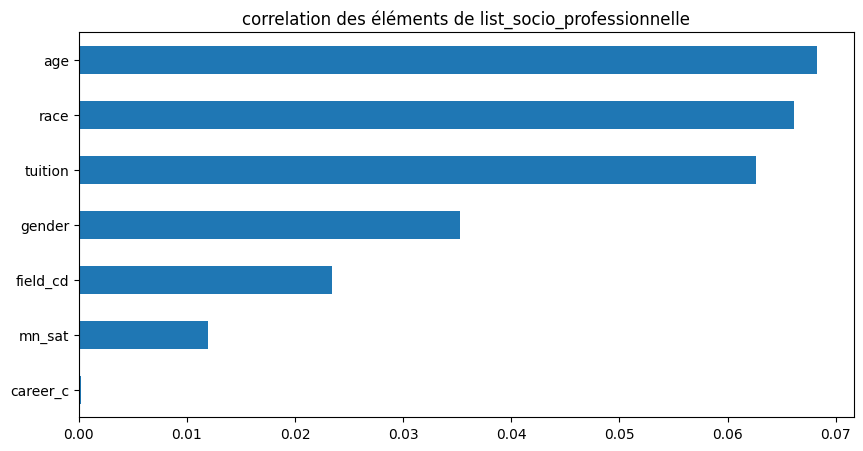

In [ ]:
## Recherche des correlations de 'income' avec les éléments de la liste 'list_socio_professionnelle'
corr_SP=abs(df[list_socio_professionnelle].corr().drop('income'))
corr_SP=corr_SP['income'].sort_values(ascending=False)
print(corr_SP)

## on visualise
plt.figure(figsize=(10,5))
corr_SP.sort_values(ascending=True).plot(kind='barh')
plt.title('correlation des éléments de list_socio_professionnelle')
plt.show()
## Les correlations sont très faibles pour pouvoir exploiter ces colonnes en vue d'une imputation.
## Mais je vais quand même procéder comme expliqué plus haut.
## Entre 'age','race','field_cd finalement je retiens 'age' qui a la meilleure correlation avec 'income'.
## Il n'y a pas ici de causalité entre ces 2 variables. J'utilise cet artifice comme excercice de style,
## en situation réelle, sans causalité ou forte correlation je m'abstiendrai,
## quoique je le trouve moins discutable que d'utiliser la médiane générale pour imputer un si grand nombre de données.

Traitement des valeurs manquantes de 'age'

In [ ]:
## On a 1,13% de valeurs manquantes pour l'age, on va leur imputer l'age median
print(dict_features['age']) ## observer les info d'intérêt
print(df['age'].isnull().sum())

['age', 33, [95, '1.13%'], dtype('float64'), [63, 0], [55.0, 18.0]]
95


In [ ]:
## On procède à l'imputation par la médiane
df['age'].fillna(df['age'].median(),inplace=True)
#mise à jour du dictionnaire
dict_features=func_dict_features(df)
## On vérifie qu'il n'y a plus de valeurs nulles
print(dict_features['age'])

['age', 33, [0, '0.0%'], dtype('float64'), [68, 0], [55.0, 18.0]]


Traitement des outliers de 'age': [𝑋¯−3𝜎,𝑋¯+3𝜎]

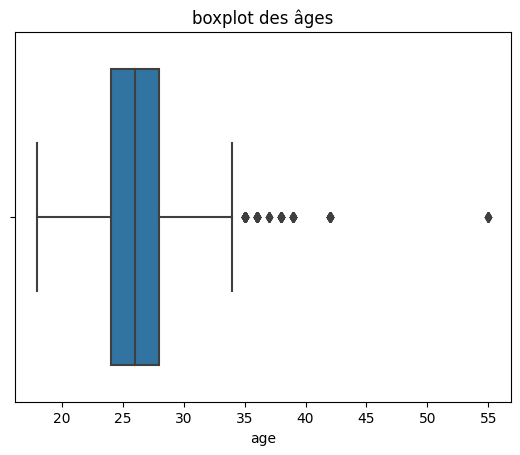

In [ ]:
## boxplot des ages pour visualiser les outliers
sns.boxplot(data=df, x="age")
plt.title("boxplot des âges")
plt.show()

In [ ]:
## On a maintenant 68 outliers pour 'age', on va les supprimer
dict_features['age']

['age', 33, [0, '0.0%'], dtype('float64'), [68, 0], [55.0, 18.0]]

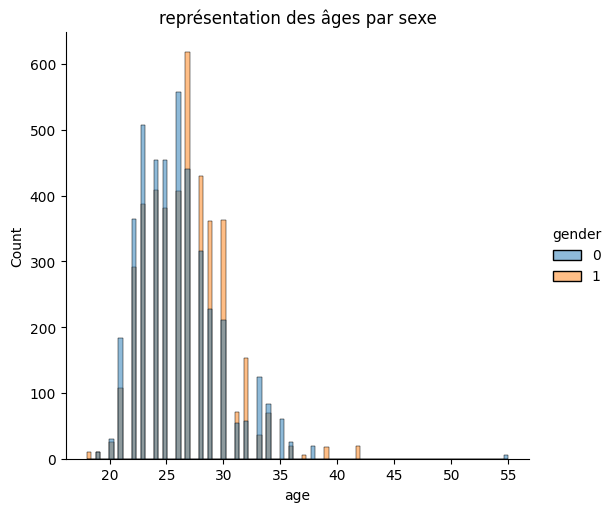

In [ ]:
## On visualise la colonne 'age' avec ses outliers
## Les 20-30 sont les plus nombreux avec un pic à 27 ans.
sns.displot(data=df, x="age",hue='gender',aspect=10/9)
plt.title("représentation des âges par sexe")
plt.show()

In [ ]:
## On applique le mask pour supprimer les outliers dans 'age'
## récupère la dataframe df et le dictonnaire dict_features mis à jour mis à jour
df=func_mask('age',df)
## mise à jour de dict_features
dict_features = func_dict_features(df)

In [ ]:
## on vérifie que les outliers ont bien été supprimés
print(dict_features.get('age'))
print()
if dict_features.get('age')[4][0]+dict_features.get('age')[4][1]==0:
  print("outliers supprimés")
print()

['age', 33, [0, '0.0%'], dtype('float64'), [0, 0], [36.0, 18.0]]

outliers supprimés



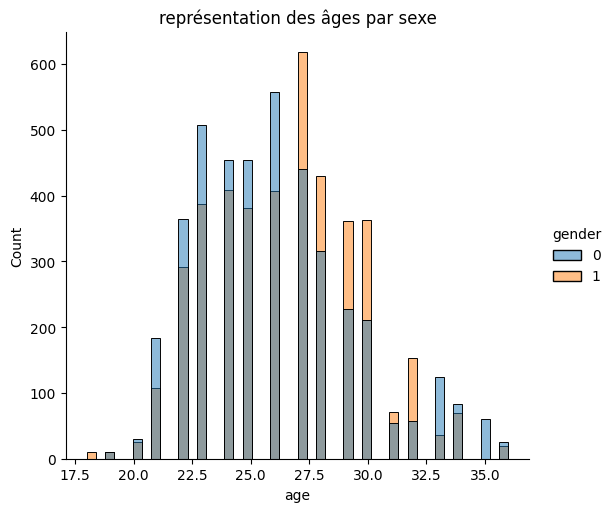

In [ ]:
## On visualise après traitement des outliers
sns.displot(data=df, x="age",aspect=10/9,hue='gender')
plt.title("représentation des âges par sexe")
plt.show()

Traitement des valeurs manquantes de 'income'

In [ ]:
dict_features['income']

['income', 44, [4094, '49.27%'], dtype('float64'), [50, 0], [109031.0, 8607.0]]

In [ ]:
## On regarde dans groupby('age') les valeurs medianes à imputer aux valeurs nulles de 'income'
df_groupby = df.groupby(['age'])[['income']].median()
print("valeurs uniques:",df['age'].nunique())
print()
print(df_groupby)

valeurs uniques: 19

       income
age          
18.0  30768.0
19.0  17378.0
20.0  42390.0
21.0  52805.0
22.0  49409.0
23.0  37248.0
24.0  43581.0
25.0  41547.0
26.0  49409.0
27.0  46185.0
28.0  40695.0
29.0  42397.0
30.0  37994.0
31.0  45300.0
32.0  35409.0
33.0  33906.0
34.0  37405.0
35.0  32563.0
36.0  58802.0


In [ ]:
## On peut récupérer une liste like des valeurs uniques de 'age'
df_groupby.index

Float64Index([18.0, 19.0, 20.0, 21.0, 22.0, 23.0, 24.0, 25.0, 26.0, 27.0, 28.0,
              29.0, 30.0, 31.0, 32.0, 33.0, 34.0, 35.0, 36.0],
             dtype='float64', name='age')

In [ ]:
## On peut récupérer une liste like des médianes de 'income' groupés par 'age'
df_groupby.values

array([[30768.],
       [17378.],
       [42390.],
       [52805.],
       [49409.],
       [37248.],
       [43581.],
       [41547.],
       [49409.],
       [46185.],
       [40695.],
       [42397.],
       [37994.],
       [45300.],
       [35409.],
       [33906.],
       [37405.],
       [32563.],
       [58802.]])

In [ ]:
## On calcule le nombre de valeurs nulles de 'income' par 'age': tuple(age,NaN par 'age')
ages=[]
for age in df_groupby.index:
  ages.append((age,df[df['age']==age]['income'].isnull().sum()))
print("tuples(age,NaN par 'age')")
print(ages)

tuples(age,NaN par 'age')
[(18.0, 0), (19.0, 10), (20.0, 45), (21.0, 99), (22.0, 276), (23.0, 351), (24.0, 427), (25.0, 368), (26.0, 461), (27.0, 568), (28.0, 371), (29.0, 357), (30.0, 332), (31.0, 56), (32.0, 137), (33.0, 104), (34.0, 77), (35.0, 46), (36.0, 9)]


In [ ]:
## On impute ces valeurs nulles par les valeurs medianes correspondantes de 'income'
for age in df_groupby.index:
  df.loc[df['age']==age,['income']]=df.loc[df['age']==age,['income']].fillna(df_groupby.loc[age])

## Vérification de la réussite de l'opération si réponse = 0
if df['income'].isnull().sum() == 0:
  print("nombre de Nan dans income :",df['income'].isnull().sum())

nombre de Nan dans income : 0


In [ ]:
## On recalcule le nombre de valeurs nulles de 'income' par 'age': tuple(age,NaN par 'age')
ages=[]
for age in df_groupby.index:
  ages.append((age,df[df['age']==age]['income'].isnull().sum()))
print("tuples(age,NaN par 'age')")
print(ages)

tuples(age,NaN par 'age')
[(18.0, 0), (19.0, 0), (20.0, 0), (21.0, 0), (22.0, 0), (23.0, 0), (24.0, 0), (25.0, 0), (26.0, 0), (27.0, 0), (28.0, 0), (29.0, 0), (30.0, 0), (31.0, 0), (32.0, 0), (33.0, 0), (34.0, 0), (35.0, 0), (36.0, 0)]


In [ ]:
## mise à jour du dictionnaire
dict_features=func_dict_features(df)

Traitement des outliers de 'income': [𝑋¯−3𝜎,𝑋¯+3𝜎]

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8310 entries, 0 to 8309
Columns: 195 entries, iid to amb5_3
dtypes: float64(177), int64(13), object(5)
memory usage: 12.4+ MB


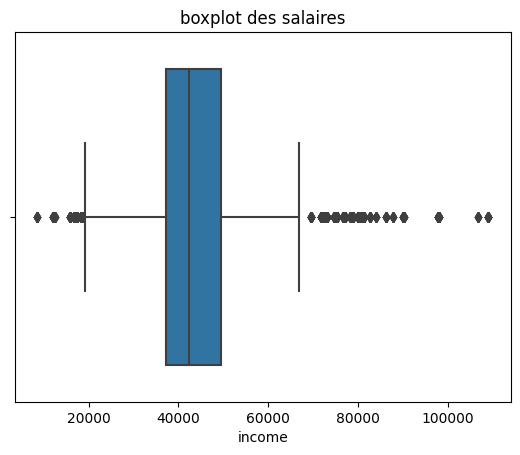

In [ ]:
## boxplot des incomes pour visualiser les outliers
sns.boxplot(data=df, x="income")
plt.title("boxplot des salaires")
plt.show()

In [ ]:
## Combien d'outliers dans income
print(dict_features.get('income'))
print("outliers dans 'income': ",dict_features.get('income')[4][0]+dict_features.get('income')[4][1])

['income', 44, [0, '0.0%'], dtype('float64'), [112, 0], [109031.0, 8607.0]]
outliers dans 'income':  112


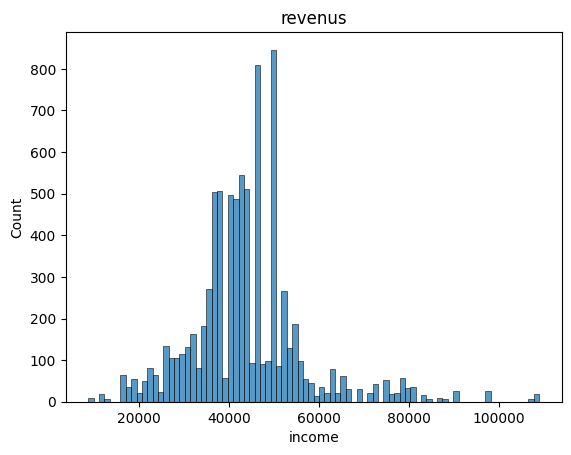

In [ ]:
## On visualise la colonne 'income' avec ses outliers
sns.histplot(data=df, x="income")
plt.title("revenus")
plt.show()

In [ ]:
## On traite les outliers dans 'income'
## On récupère df et dict_features mis à jour
df=func_mask('income',df)
## mise à jour de dict_features
dict_features = func_dict_features(df)

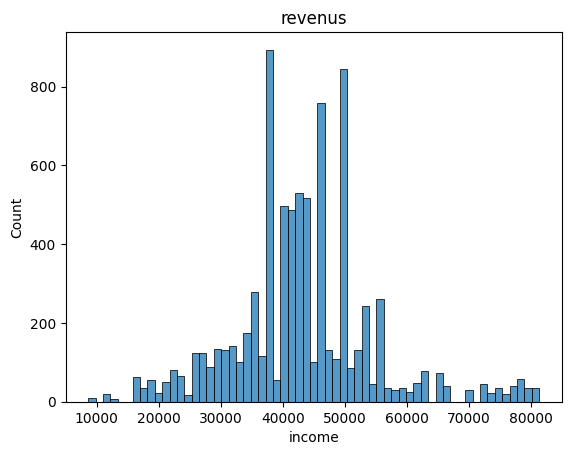

In [ ]:
## Visualisation des revenus après traitement des outliers
sns.histplot(data=df, x="income")
plt.title("revenus")
plt.show()

On va ensuite radicalement supprimer toutes les valeurs nulles, présentes dans 'list_socio_professionnelle'+'list_hobbies'.

In [ ]:
## liste des colonnes à utiliser en subset pour dropna
list_dropna = [x for x in list_socio_professionnelle+list_hobbies if x in df.columns]
len(list_dropna)

30

In [ ]:
print(df.shape)
df.dropna(subset=list_dropna,inplace=True)
df.shape

(8198, 195)


(2705, 195)

In [ ]:
## On supprime les lignes et colonnes vides
df.dropna(how='all',axis=0,inplace=True)
df.dropna(how='all',axis=1,inplace=True)
df.shape

(2705, 194)

In [ ]:
#mise à jour du dictionnaire
dict_features=func_dict_features(df)

In [ ]:
## On constate que les id's n'ont plus de valeurs manquantes
for col in ['id','iid','idg','pid','wave']:
    print(func_features(col))

(['id', 1, [0, '0.0%'], dtype('float64'), [0, 0], [21.0, 1.0]], ['subject number within wave', None, None])
(['iid', 0, [0, '0.0%'], dtype('int64'), [0, 0], [551, 234]], ['unique subject number, group(wave id gender)', None, None])
(['idg', 3, [0, '0.0%'], dtype('int64'), [0, 0], [42, 1]], ['subject number within gender, group(id gender)', None, None])
(['pid', 11, [0, '0.0%'], dtype('float64'), [0, 0], [552.0, 234.0]], ['partner’s iid number', None, None])
(['wave', 5, [0, '0.0%'], dtype('int64'), [0, 0], [21, 10]], [{'Wave #': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21], 'Date': ['October 16th,02', 'October 23rd,02', 'November 12th,02', 'November 12th,02', 'November 20th,02', 'March 26th,03', 'March 26th,03', 'April 2nd,03', 'April 2nd,03', 'September 24th,03', 'September 24th,03', 'October 7th,03', 'October 8th,03', 'October 8th,03', 'February 24th,04', 'February 25th,04', 'February 25th,04', 'April 6th,04', 'April 6th,04', 'April 7th,04', 'April 7th,

Traitement du déséquilibre résultant sur 'gender'

In [ ]:
## on constate que le dataset traité est biaisé sur la colonne 'gender' par rapport au dataset de départ
print(f"pourcentage de départ de Male:1 et Female:0 \n{100*df_speed_dating['gender'].value_counts(normalize=True)}")
print()

print(f"pourcentage final de Male:1 et Female:0 \n{100*df['gender'].value_counts(normalize=True)}")
## On constate que les rapports se sont inversés.

pourcentage de départ de Male:1 et Female:0 
1    50.05968
0    49.94032
Name: gender, dtype: float64

pourcentage final de Male:1 et Female:0 
0    60.739372
1    39.260628
Name: gender, dtype: float64


In [ ]:
## On compte le nombre de male dans le dataset final
count_M_df=df[df['gender']==1]['gender'].count()
## On va calculer le ratio F/M dans le dataset de départ
ration_F_M_df=df_speed_dating[df_speed_dating['gender']==0]['gender'].count()/df_speed_dating[df_speed_dating['gender']==1]['gender'].count()
## calcule le nombre de Female à garder
nb_female=int(count_M_df*ration_F_M_df)
nb_female

1059

In [ ]:
## On cherche à obtenir un dataset final avec approximativement les mêmes pourcentages que dans le dataset de départ
df_sample=df[df['gender']==0].sample(n=nb_female,random_state=7)
print("nombre de row de l'échantillon obtenu:",df_sample.shape[0])
## On remplace par les nouvelles valeurs
df.loc[df['gender']==0,['gender']]=df_sample['gender']
df=df.dropna(subset='gender').reset_index(drop=True)
## On obtient ainsi un dataset final avec les mêmes proportions en terme de 'gender' que le dataset initial
print(100*df['gender'].value_counts(normalize=True))
## mise à jour du dictionnaire
dict_features=func_dict_features(df)
print()
df.info()
## on peut maintenant passer à l'étape suivante

nombre de row de l'échantillon obtenu: 1059
1.0    50.070721
0.0    49.929279
Name: gender, dtype: float64

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2121 entries, 0 to 2120
Columns: 194 entries, iid to amb5_3
dtypes: float64(177), int64(12), object(5)
memory usage: 3.1+ MB


#IV. ANALYSE

1. ON VA CREER UNE MATICE DES CORRELATIONS QUI POURRAIT NOUS AIDER DANS NOTRE ANALYSE

In [ ]:
corr_df=df.corr()
corr_df

<ipython-input-213-5e7cf3b94857>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_df=df.corr()


,iid,id,gender,idg,condtn,wave,round,position,positin1,order,...,attr3_3,sinc3_3,intel3_3,fun3_3,amb3_3,attr5_3,sinc5_3,intel5_3,fun5_3,amb5_3
iid,1.000000,0.005907,0.099719,0.009829,0.078891,0.990317,0.091344,0.037876,0.104682,0.039406,...,0.233554,-0.058512,-0.031687,0.030898,-0.040348,0.359727,0.056363,0.030800,0.203447,0.055006
id,0.005907,1.000000,0.066659,0.998730,0.303083,-0.051001,0.420849,0.216348,0.220157,0.162203,...,0.063828,0.152443,0.094856,0.044903,0.234370,0.036688,0.125861,0.013094,-0.000687,0.057959
gender,0.099719,0.066659,1.000000,0.109854,0.044864,0.007880,0.034871,0.012859,0.041697,0.004401,...,-0.243452,-0.312372,0.054288,-0.074633,-0.031493,-0.250524,-0.305752,0.014012,-0.028192,-0.000881
idg,0.009829,0.998730,0.109854,1.000000,0.308416,-0.050640,0.429986,0.220049,0.223911,0.165094,...,0.055257,0.138815,0.097478,0.042377,0.232279,0.029258,0.113173,0.011743,0.002427,0.056824
condtn,0.078891,0.303083,0.044864,0.308416,1.000000,0.061717,0.717326,0.279046,0.279662,0.273641,...,0.015418,-0.033968,0.115570,0.117376,0.137303,0.000960,0.013843,0.088768,0.135515,0.143736
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
attr5_3,0.359727,0.036688,-0.250524,0.029258,0.000960,0.384073,-0.012409,0.029083,0.132478,0.017659,...,0.873190,0.239415,0.216029,0.257602,0.195926,1.000000,0.122080,0.244320,0.351886,0.130411
sinc5_3,0.056363,0.125861,-0.305752,0.113173,0.013843,0.079969,0.020399,0.155981,0.091341,-0.004864,...,0.091482,0.468383,0.315024,0.276554,0.162752,0.122080,1.000000,0.602132,0.287641,0.370273
intel5_3,0.030800,0.013094,0.014012,0.011743,0.088768,0.026807,0.019544,0.114385,0.188102,-0.003589,...,0.209650,0.330057,0.658818,0.343806,0.316584,0.244320,0.602132,1.000000,0.379332,0.514593
fun5_3,0.203447,-0.000687,-0.028192,0.002427,0.135515,0.210953,0.106431,0.159245,0.173726,0.060106,...,0.253467,0.170139,0.332166,0.827711,0.370092,0.351886,0.287641,0.379332,1.000000,0.376565


On ne va pas présenter la heatmap car il y a trop de colonnes à représenter et donc on ne voit rien, c'est illisible

In [ ]:
## Code de la heatmap si besoin
#corr_df = abs(corr_df.round(2))
#plt.figure(figsize=(25,25))
#sns.heatmap(corr_df.values,annot=True,  linewidths=.5, vmax=1, square=True,xticklabels=corr_df.columns.tolist(), yticklabels=corr_df.index.tolist())
#plt.show()

On va afficher les correlations par des paires des colonnes du dataframe, triées  par ordre décroissant sur la correlation. Ceci pourrait nous servir comme base pour voir éventuellement les correlations à analyser.

In [ ]:
## dataframe des correlations entre 2 variables
list_drop_corr=['id','iid','idg','pid']
corr_df=df[[col for col in df.columns if col not in list_drop_corr]].corr()
corr_tuple=abs(corr_df[(corr_df<1)&(corr_df>0.75)]).stack().sort_values(ascending=False).reset_index()
corr_tuple.columns=['col1','col2','corr']
## On enlève les doublons
corr_tuple=corr_tuple.drop_duplicates(subset='corr')
display(corr_tuple)
print()
print(corr_tuple.shape)

<ipython-input-215-7444e459d67d>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_df=df[[col for col in df.columns if col not in list_drop_corr]].corr()


,col1,col2,corr
0,num_in_3,sinc1_s,0.969414
2,num_in_3,shar1_s,0.910803
4,sinc1_3,num_in_3,0.910239
6,attr3_s,attr3_2,0.907931
8,num_in_3,sinc1_1,0.899761
10,attr5_2,attr3_s,0.883832
12,met,met_o,0.876413
14,fun4_2,num_in_3,0.874292
16,attr5_3,attr3_3,0.873190
18,amb3_s,amb3_2,0.869546



(46, 3)


2. DANS UN SOUCI DE COMPREHENSION, D'ANALYSE ET DE VISUALISATION, ON VA DECODER CERTAINES COLONNES

In [ ]:
# On decode le 'dec
df['dec'] = df['dec'].map({ 0 : 'No',1 : 'Yes'})

## On decode le 'dec_o'
df['dec_o'] = df['dec_o'].map({ 0 : 'No',1 : 'Yes'})

## On décode le 'race'
df['race']=df["race"].map({1:"Black/African American",2:"European/Caucasian-American",\
                        3:"Latino/Hispanic American",4:"Asian/Pacific Islander/Asian-American",5:"Native American",6:"Other"})

## On decode le 'race_o'
df['race_o'] = df['race_o'].map({1:"Black/African American",2:"European/Caucasian-American",\
                        3:"Latino/Hispanic American",4:"Asian/Pacific Islander/Asian-American",5:"Native American",6:"Other"})

## On decode le 'date_3'
df['date_3'] = df['date_3'].map({0 : 'No',1 : 'Yes'})

## On décode le "gender":	"Female=0, Male=1"
df["gender"]=df["gender"].map({0:'Female',1:'Male'})

## On décode le 'match'
df['match']=df['match'].map({0 : 'No',1:'Yes'})

## On décode le 'samerace'
df['samerace']=df['samerace'].map({0 : 'No',1:'Yes'})

## on décode le 'goal'
df['goal']=df['goal'].map({1:'Seemed like a fun night out',2:'To meet new people',3:'To get a date',\
                                               4:'Looking for a serious relationship',5:'To say I did it',6:'Other'})

## on décode le 'date'
df['date']=df['date'].map({1:'Several times a week',2:'Twice a week',3:'Once a week',4:'Twice a month',\
                                               5:'Once a month',6:'Several times a year',7:'Almost never'})

## on decode le 'go_out'
df['go_out']=df['go_out'].map({1:'Several times a week',2:'Twice a week',3:'Once a week',4:'Twice a month=4',\
                                                   5:'Once a month',6:'Several times a year',7:'Almost never'})

## on decode le 'numdat_2'
df['numdat_2']=df['numdat_2'].map({1:'Too many',2:'Just right'})


In [ ]:
## mise à jour du dictionnaire
dict_features=func_dict_features(df)

3. VISUALISATION DE LA POPULATION

Male      50.07%
Female    49.93%
Name: gender, dtype: object
-------------------------------------------------------------------------


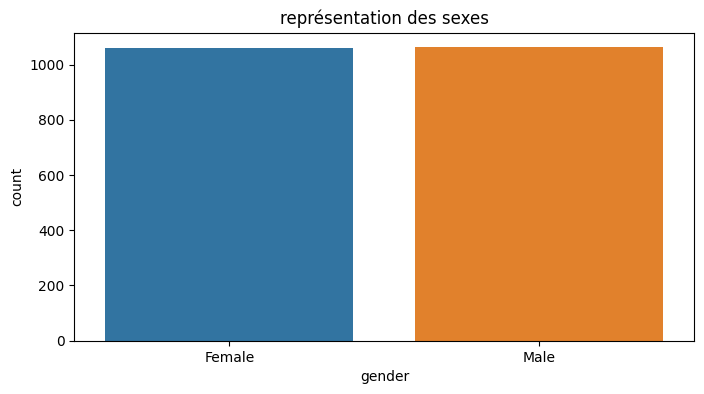

In [ ]:
## répartition plutôt équilibrée entre hommes et femmes
print(round(df['gender'].value_counts(normalize=True)*100,2).astype(str).apply(lambda x:x+"%"))
print("-------------------------------------------------------------------------")
plt.figure(figsize=(8,4))
sns.countplot(data=df, x="gender")
plt.title("représentation des sexes")
plt.show()

European/Caucasian-American              1300
Asian/Pacific Islander/Asian-American     510
Latino/Hispanic American                  132
Black/African American                    104
Other                                      75
Name: race, dtype: int64
----------------------------------------------------------------------------


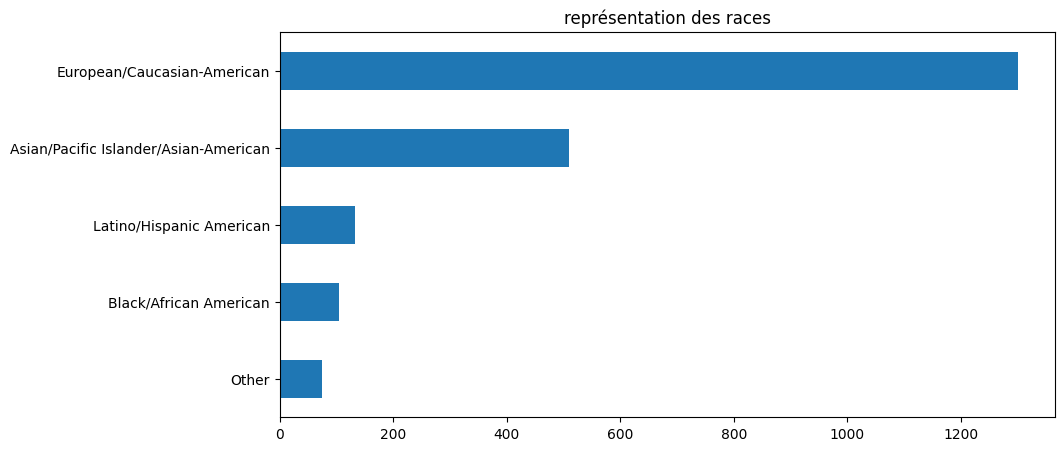

In [ ]:
## Le type caucasien est largement sureprésenté
## Les natives americans en sont absents
print(df['race'].value_counts())
print("----------------------------------------------------------------------------")

plt.figure(figsize=(10,5))
df['race'].value_counts().sort_values().plot(kind='barh',)
plt.title("représentation des races")
plt.show()

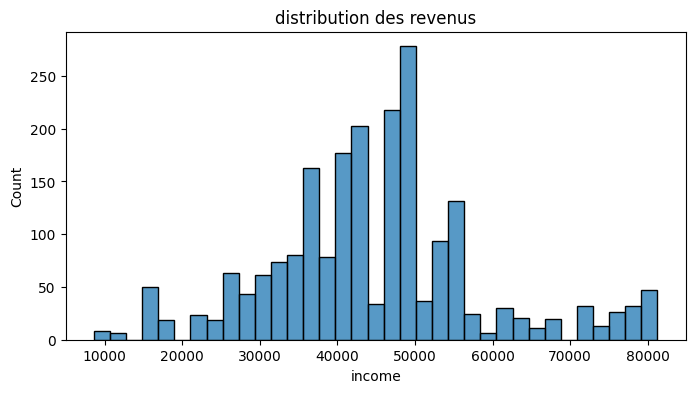

In [ ]:
## distribution des revenus
plt.figure(figsize=(8,4))
sns.histplot(data=df, x="income")
plt.title("distribution des revenus")
plt.show()

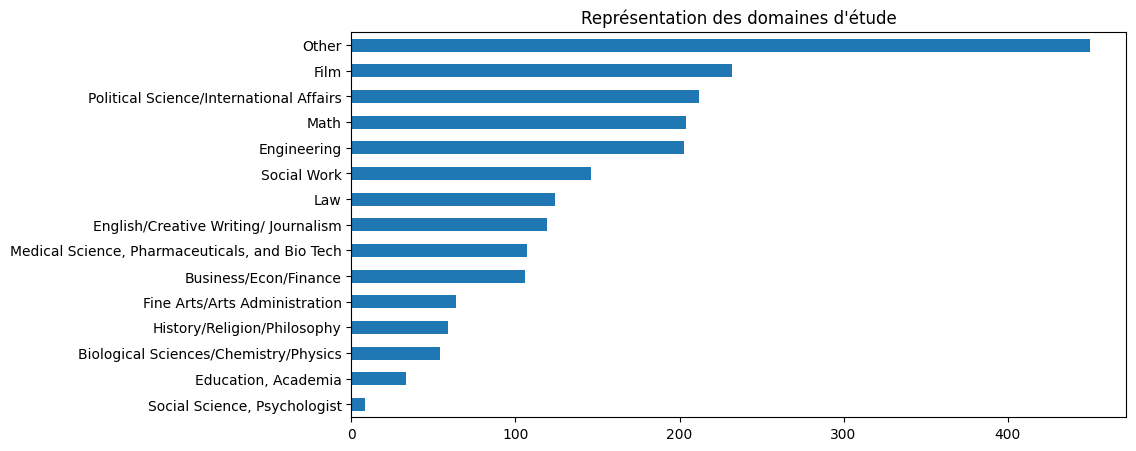

In [ ]:
## Représentation des domainnes d'étude
## On récupère les clés dans dict_meanings pour les xticks
field_code=np.arange(df['field_cd'].nunique())
## On récupère les valeurs dans dict_meanings pour les xticks
field_str=[dict_meanings['field_cd']['field coded'][x] for x in df['field_cd'].unique() ]

plt.figure(figsize=(10,5))

df['field_cd'].value_counts().sort_values().plot(kind='barh',)
plt.yticks(field_code,field_str)
plt.title("Représentation des domaines d'étude")
plt.show()

Harvard               90
Columbia              73
UC Berkeley           60
NYU                   57
Brown                 57
                      ..
John Hopkins           6
Notre Dame             6
Purdue                 5
CSUN                   4
Bennington College     4
Name: undergrd, Length: 119, dtype: int64
----------------------------------------------------------------------------


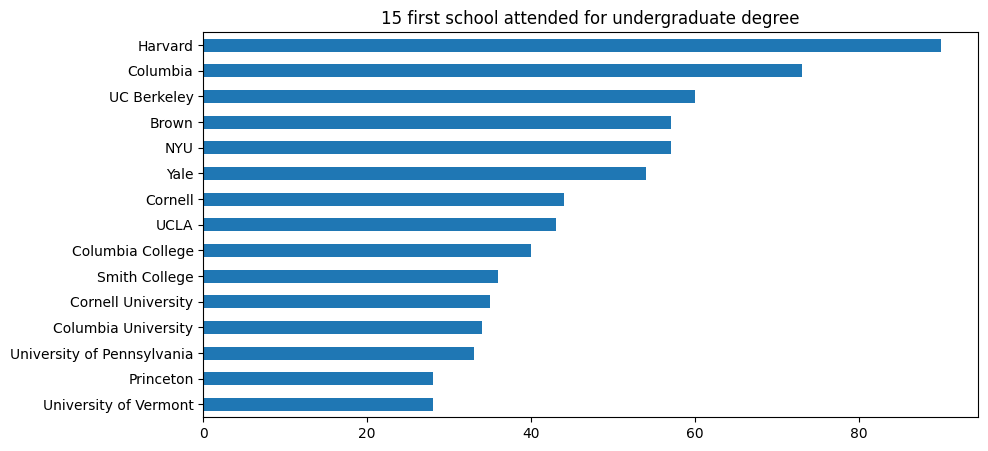

In [ ]:
## Représentation des 15 premières écoles
print(df['undergrd'].value_counts())
print("----------------------------------------------------------------------------")

plt.figure(figsize=(10,5))
df['undergrd'].value_counts().head(15).sort_values().plot(kind='barh',)
plt.title("15 first school attended for undergraduate degree")
plt.show()

professor                       57
Lawyer                          45
Social Work                     44
Social Worker                   41
Consulting                      40
                                ..
WRITING                          5
Entrepreneurship                 4
epidemiologist                   4
Social Work Policy               4
Fixed Income Sales & Trading     3
Name: career, Length: 139, dtype: int64
----------------------------------------------------------------------------


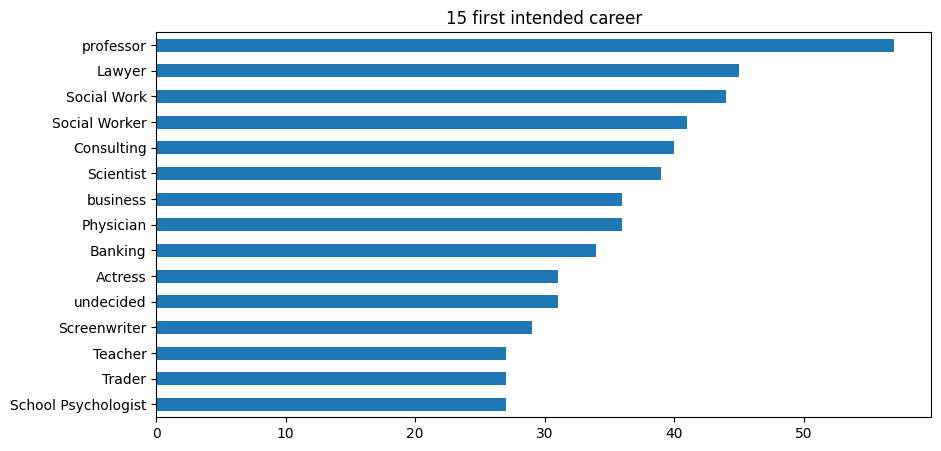

In [ ]:
## 15 first your intended career
print(df['career'].value_counts())
print("----------------------------------------------------------------------------")

plt.figure(figsize=(10,5))
df['career'].value_counts().head(15).sort_values().plot(kind='barh',)
plt.title("15 first intended career")
plt.show()

4. ANALYSE

In [ ]:
## On crée un dataframe des 'match' positifs et un autre des match négatifs
df_match_Y = df[df['match']=='Yes']
df_match_N = df[df['match']=='No']

In [ ]:
print(df.shape)
print(df_match_Y.shape)
print(df_match_N.shape)

(2121, 194)
(322, 194)
(1799, 194)


goal                                gender
To meet new people                  Female    21.74
Seemed like a fun night out         Male      21.12
                                    Female    19.57
To meet new people                  Male      12.73
To get a date                       Male       7.76
To say I did it                     Female     5.28
Other                               Female     3.73
                                    Male       3.73
To get a date                       Female     2.17
Looking for a serious relationship  Female     1.55
                                    Male       0.31
To say I did it                     Male       0.31
Name: gender, dtype: float64


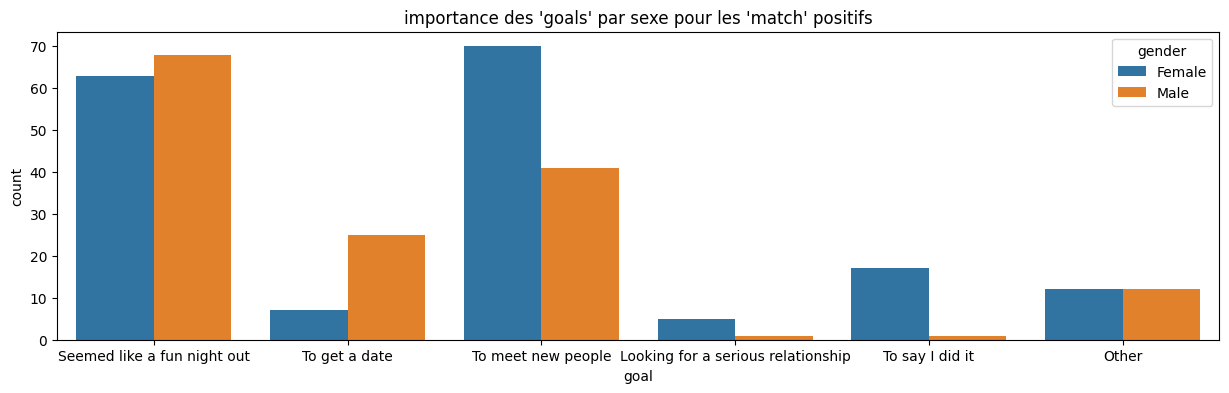

In [ ]:
## parmis les match positifs, les 'goal' en fonction du sexe
print(round(100*df_match_Y.groupby('goal')['gender'].value_counts()/df_match_Y['gender'].count(),2).sort_values(ascending=False))
plt.figure(figsize=(15,4))
sns.countplot(x="goal",hue='gender',data=df_match_Y)
plt.title("importance des 'goals' par sexe pour les 'match' positifs")
plt.show()

## 'rencontrer de nouvelles personnes' est un critère plus de 1.5 fois plus important chez les femmes que chez les hommes
## et vient d'ailleurs en première place chez les femmes.
## Chez les hommes c'est le fun qui vient en première position
##

0    Twice a week
Name: go_out, dtype: object



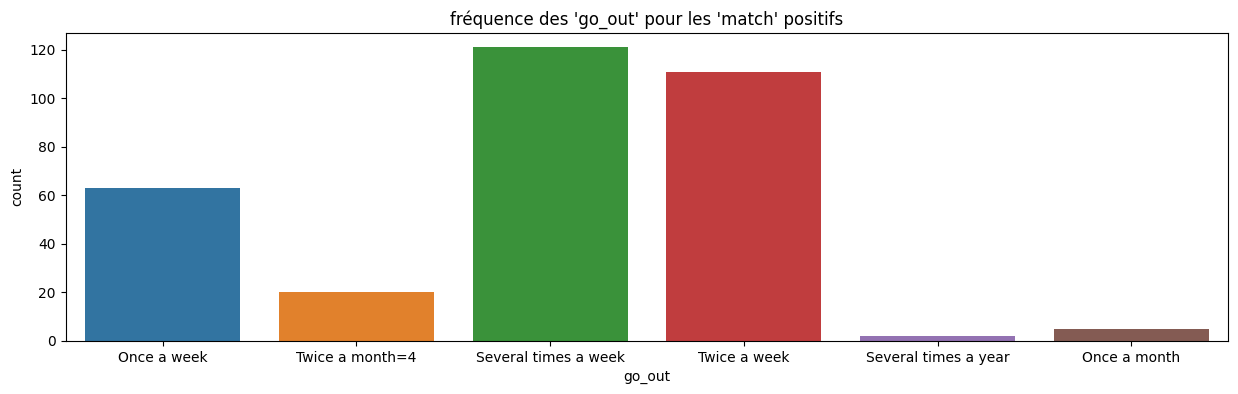

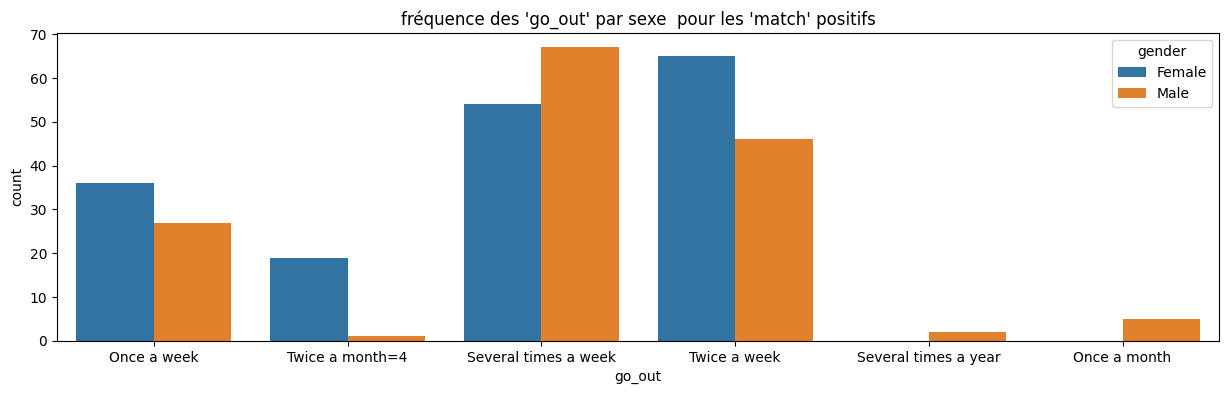

In [ ]:
## fréquence des sorties (pas forcément des dates)
print(df['go_out'].mode())
print()
plt.figure(figsize=(15,4))
sns.countplot(data=df_match_Y, x="go_out")
plt.title("fréquence des 'go_out' pour les 'match' positifs")
plt.show()
## La fréquence de sortie générale est de 2x par semaine
## Or en cas de match il passe à Plusieurs fois par semaine
## dans le détail entre homme, femme en cas de match: 2x par semaine pour les femmes et plusieurs fois par semaine chez les hommes
print()
plt.figure(figsize=(15,4))
sns.countplot(data=df_match_Y, x="go_out", hue='gender')
plt.title("fréquence des 'go_out' par sexe  pour les 'match' positifs")
plt.show()

0    Twice a month
Name: date, dtype: object



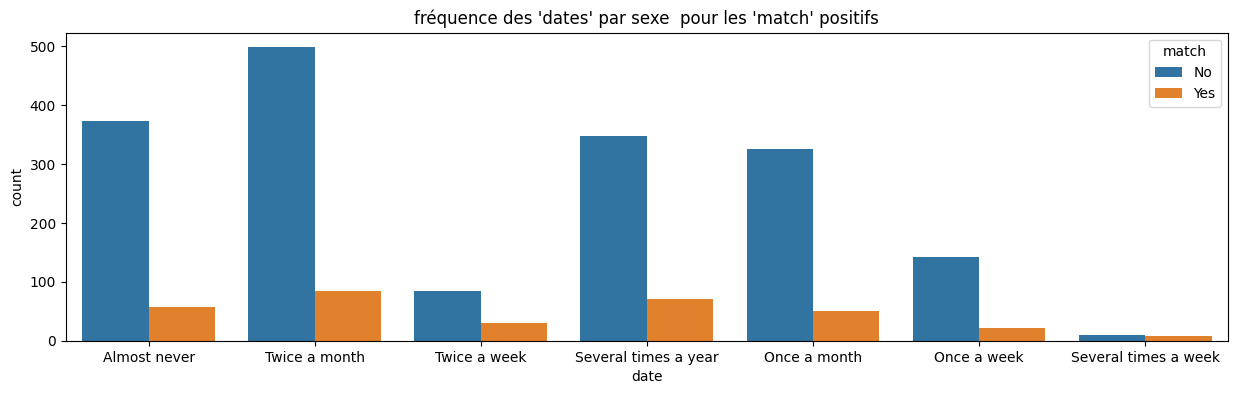

In [ ]:
print(df_match_Y['date'].mode())
print()
plt.figure(figsize=(15,4))
sns.countplot(data=df, x="date",hue='match')
plt.title("fréquence des 'dates' par sexe  pour les 'match' positifs")
plt.show()
## Ceux ont 2 RDV par mois match plus

        attr  amb  fun  shar  intel
gender                             
Female   174  158  171   155    172
Male     148  144  148   142    148


<Figure size 800x400 with 0 Axes>

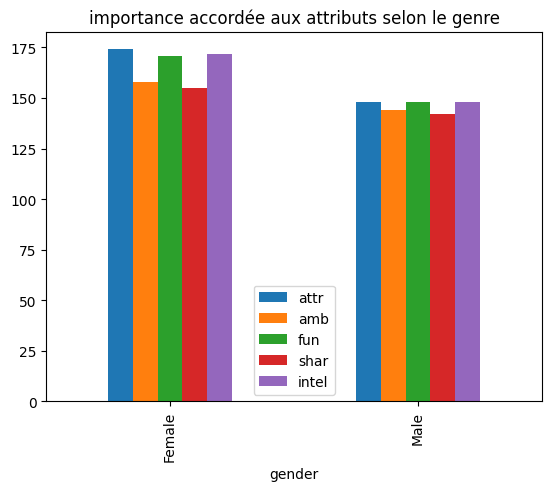

In [ ]:
## importance accordée aux attributs selon le genre
attributs=df_match_Y.groupby('gender')[['attr','amb','fun','shar','intel']].count()
print(attributs)
plt.figure(figsize=(8,4))
attributs.plot(kind='bar')
plt.title("importance accordée aux attributs selon le genre")
plt.show()
## globalement, attirance, intelligence et fun viennent en premier dans cet ordre chez les femmes
## chez les hommes ils sont plutôt à égalité

        attr
gender      
Female    32
Male      37



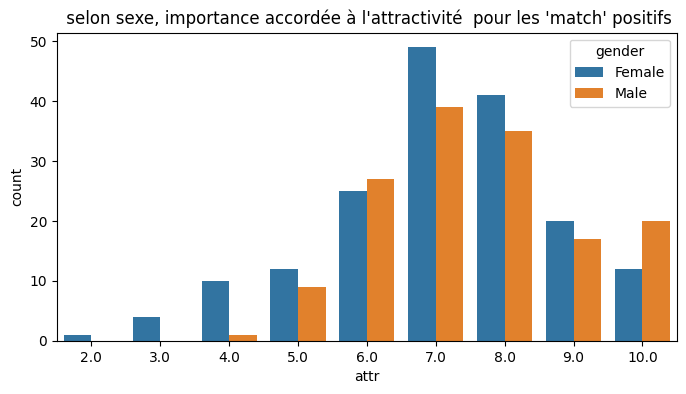

In [ ]:
print(df_match_Y[df_match_Y['attr']>8].groupby('gender')[['attr']].count())
print()
plt.figure(figsize=(8,4))
sns.countplot(data=df_match_Y, x="attr",hue='gender')
plt.title(" selon sexe, importance accordée à l'attractivité  pour les 'match' positifs")
plt.show()
## plus grande importance accordée à l'attirance par les hommes au-delà d'une notation de 8 points
## Et les femmes donnent aussi les plus basses notes à l'attirance (notes < 6)

        amb
gender     
Female   54
Male     27



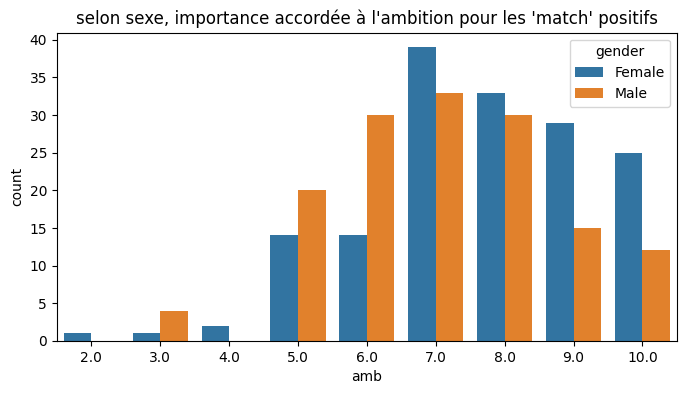

In [ ]:
print(df_match_Y[df_match_Y['amb']>8].groupby('gender')[['amb']].count())
print()
plt.figure(figsize=(8,4))
sns.countplot(data=df_match_Y, x="amb",hue='gender')
plt.title("selon sexe, importance accordée à l'ambition pour les 'match' positifs")
plt.show()
## L'ambition récolte de fortes notes à la fois chez les hommes et les femmes
## Néanmoins, les femme lui accordent plus d'importance que les hommes

        fun
gender     
Female   53
Male     30



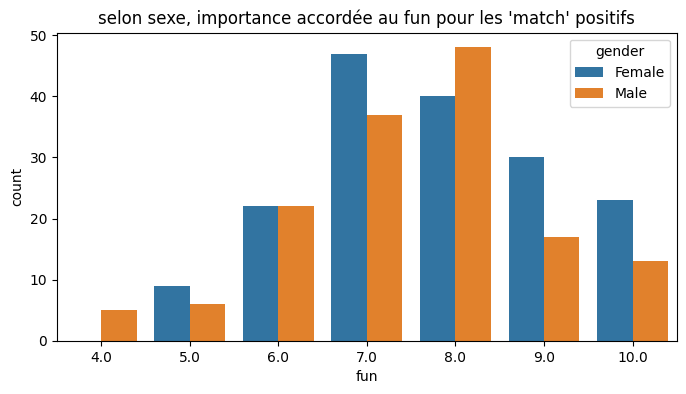

In [ ]:
print(df_match_Y[df_match_Y['fun']>8].groupby('gender')[['fun']].count())
print()
plt.figure(figsize=(8,4))
sns.countplot(data=df_match_Y, x="fun",hue='gender')
plt.title("selon sexe, importance accordée au fun pour les 'match' positifs")
plt.show()
## Le fun récolte de fortes notes à la fois chez les hommes et les femmes
## Néanmoins, les femme lui accordent plus d'importance que les hommes

        intel
gender       
Female     77
Male       44



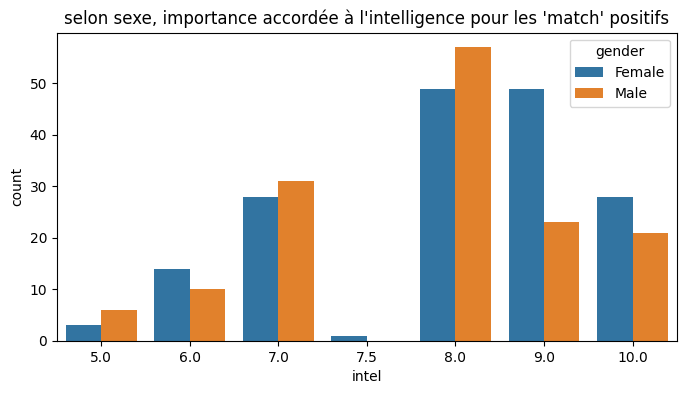

In [ ]:
print(df_match_Y[df_match_Y['intel']>8].groupby('gender')[['intel']].count())
print()
plt.figure(figsize=(8,4))
sns.countplot(data=df_match_Y, x="intel",hue='gender')
plt.title("selon sexe, importance accordée à l'intelligence pour les 'match' positifs")
plt.show()
## Les femmes donnent largement plus d'importance à l'intelligence que les hommes au-delà d'une notation de 8 points

        shar
gender      
Female    29
Male      12



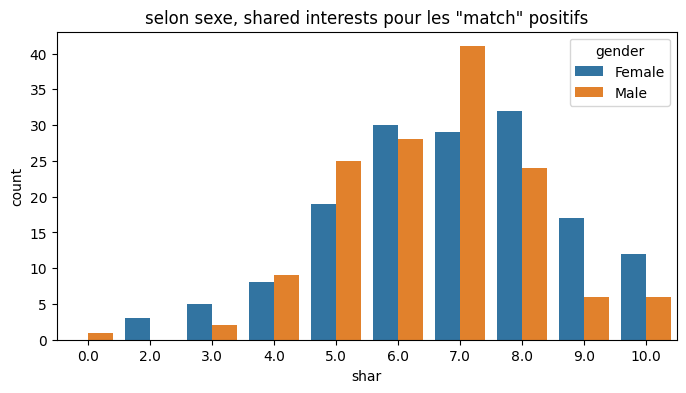

In [ ]:
print(df_match_Y[df_match_Y['shar']>8].groupby('gender')[['shar']].count())
print()
plt.figure(figsize=(8,4))
sns.countplot(data=df_match_Y, x="shar",hue='gender')
plt.title('selon sexe, shared interests pour les "match" positifs')
plt.show()
## Les femmes donnent largement plus d'importance aux intérêts partagés que les hommes au-delà d'une notation de 8 points

pourcentages en cas de match positif
No     0.543478
Yes    0.456522
Name: samerace, dtype: float64

pourcentages en cas de match négatif
No     0.579211
Yes    0.420789
Name: samerace, dtype: float64



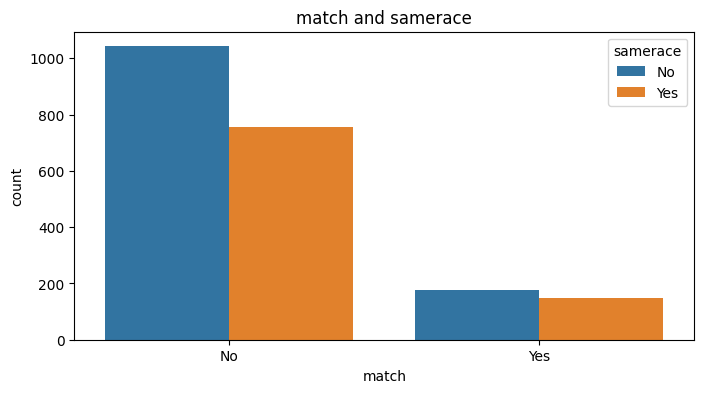

In [ ]:
print("pourcentages en cas de match positif")
print(df[df['match']=='Yes']['samerace'].value_counts(normalize=True))
print()
print("pourcentages en cas de match négatif")
print(df[df['match']=='No']['samerace'].value_counts(normalize=True))
print()
plt.figure(figsize=(8,4))
sns.countplot(data=df, x="match",hue='samerace')
plt.title('match and samerace')
plt.show()
## La race a "relativement" plus d'importance en cas match, l'écart entre yes et no devenant minime

pourcentage entre sexe: 
race                                   gender
European/Caucasian-American            Male      31.26%
                                       Female    30.03%
Asian/Pacific Islander/Asian-American  Female    12.82%
                                       Male      11.22%
Black/African American                 Male       3.58%
Latino/Hispanic American               Female     3.11%
                                       Male       3.11%
Other                                  Female     2.64%
Black/African American                 Female     1.32%
Other                                  Male        0.9%
dtype: object

pourcentage entre sexe en cas de match positif: 
race                                   gender
European/Caucasian-American            Male      31.06%
                                       Female    28.26%
Asian/Pacific Islander/Asian-American  Female    18.32%
                                       Male       7.14%
Latino/Hispanic American           

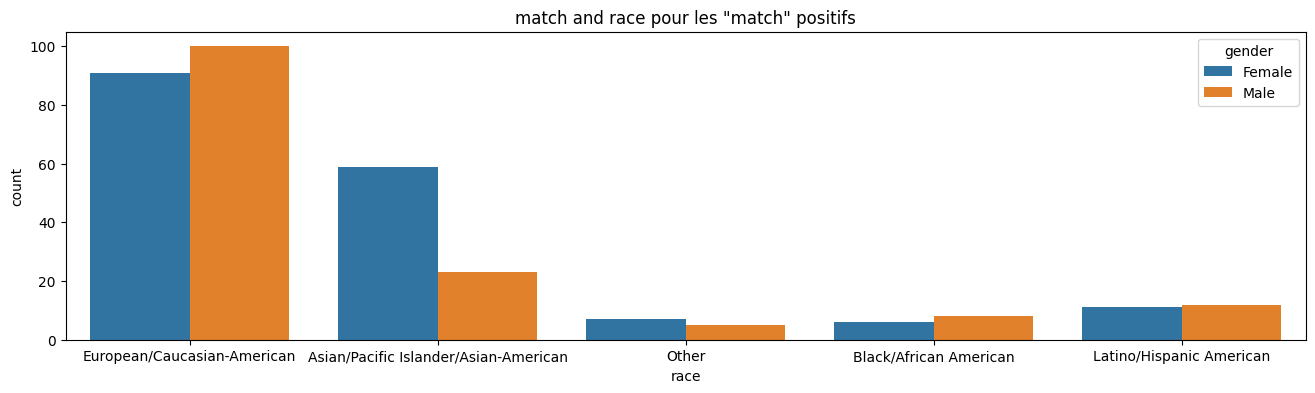

In [ ]:
## pourcentage de match entre les sexes: match positif et match négatif
print(f"pourcentage entre sexe: \n{round(df[['race','gender']].value_counts(normalize=True)*100,2).astype(str).apply(lambda x:x+'%')}")
print()
print(f"pourcentage entre sexe en cas de match positif: \n{round(df[df['match']=='Yes'][['race','gender']].value_counts(normalize=True)*100,2).astype(str).apply(lambda x:x+'%')}")
print()
plt.figure(figsize=(16,4))
sns.countplot(data=df_match_Y, x="race",hue='gender')
plt.title('match and race pour les "match" positifs')
plt.show()

## ce qui est le plus notable c'est des fortes variations chez les 'asian':
## Les femmes 'asian' augmentent leurs pourcentages de presque 6 points alors que les hommes 'asian' le baissent de + 4 points
## pour les autres des légères variations

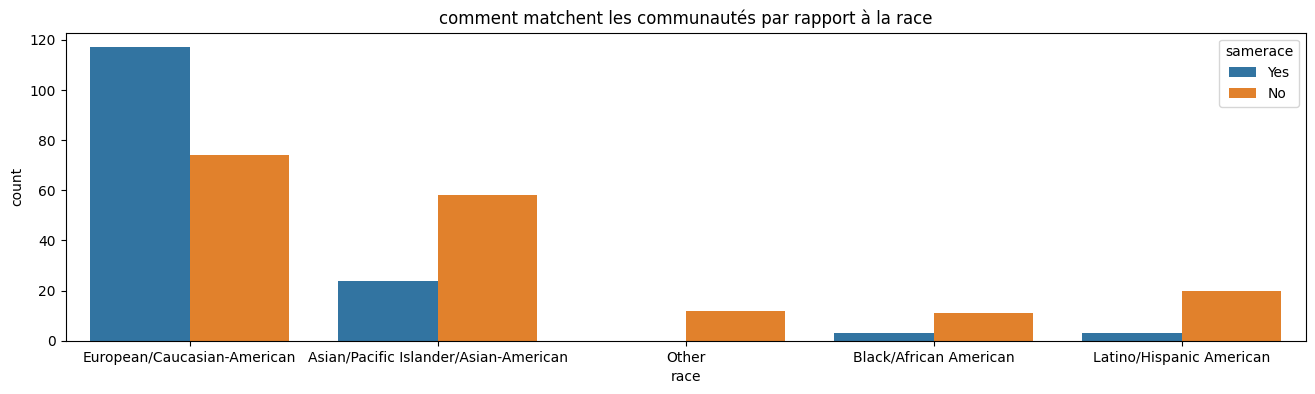

In [ ]:
## comment matchent les communautés par rapport à la race
plt.figure(figsize=(16,4))
sns.countplot(data=df_match_Y, x="race",hue='samerace')
plt.title('comment matchent les communautés par rapport à la race')
plt.show()

## On voit que les 'caucasiens' matchent plus dans leur propre race à l'inverse de toutes les autres communautés.
## Mais cela a très surement pour cause la surreprésentation des caucasiens dans le dataset.

pourcentage entre sexe: 
Male      50.07%
Female    49.93%
Name: gender, dtype: object

pourcentage entre sexe en cas de match positif: 
Female    54.04%
Male      45.96%
Name: gender, dtype: object



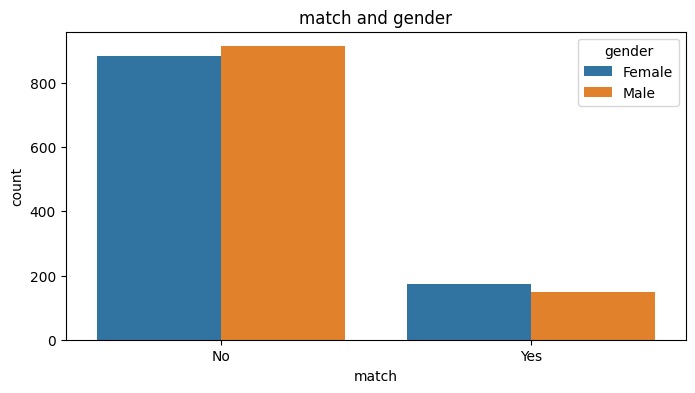

In [ ]:
## pourcentage de match entre les sexes: match positif et match négatif
print(f"pourcentage entre sexe: \n{round(df['gender'].value_counts(normalize=True)*100,2).astype(str).apply(lambda x:x+'%')}")
print()
print(f"pourcentage entre sexe en cas de match positif: \n{round(df[df['match']=='Yes']['gender'].value_counts(normalize=True)*100,2).astype(str).apply(lambda x:x+'%')}")
print()
plt.figure(figsize=(8,4))
sns.countplot(data=df, x="match",hue='gender')
plt.title('match and gender')
plt.show()
## le pourcentage de femmes augmente en cas de match positif

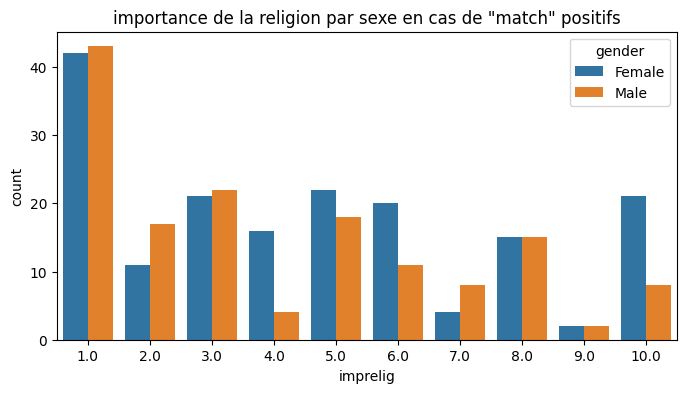

In [ ]:
plt.figure(figsize=(8,4))
sns.countplot(data=df_match_Y, x="imprelig",hue='gender')
plt.title('importance de la religion par sexe en cas de "match" positifs')
plt.show()
## Globalement, la religion n'a pas grande influence pour la plupart des gens, hommes ou femmes
## Mais pour ceux qui lui accordent de l'importance (note > 6), les femmes sont plus présentes

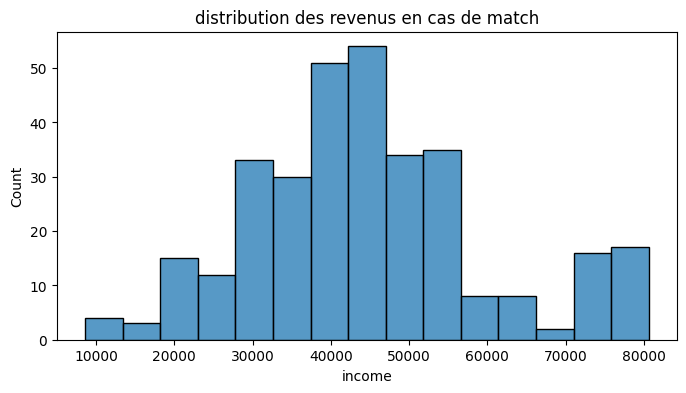

In [ ]:
## distribution des revenus en cas de match
plt.figure(figsize=(8,4))
sns.histplot(data=df_match_Y, x="income")
plt.title("distribution des revenus en cas de match")
plt.show()

La surreprésentation du type caucasien ne permet pas de tirer des conclusions générales sur l'importance de la race dans les choix. Sinon on serait enclin à dire que les 'caucasiens' matchent plus dans leur propre race à l'inverse de toutes les autres communautés et que l'importance d'être de la même race augmente en cas de matchs. Autre chose de notable c'est des fortes variations chez les 'asian de leur particpation en cas de match': Les femmes 'asian' augmentent leurs pourcentages de presque 6 points alors que les hommes 'asian' le baissent de + 4 points.
Mais tout ceci est à prendre avec des pincettes à cause du déséquilibre dans la colonne 'race'.

Globalement, la religion n'a pas grande influence pour la plupart des gens, hommes ou femmes. Mais pour ceux qui lui accordent de l'importance (note > 6), les femmes sont plus présentes

Pour les match, globalement, l'attirance, l'intelligence et le fun viennent en premier dans cet ordre chez les femmes chez les hommes ils sont plutôt à égalité. Mais si on considère de fortes exigences, c'est à dire au-delà d'une notation de 8, les hommes s'intéressent à l'attirance et les femmes s'intéressent largement plus aux autres attributs.

Les femmes participent pour faire des rencontres et les hommes plutôt pour le fun.

Ceux qui ont 2 RDV par mois font plus de match.

Ceux qui sortent plusieurs fois par semaine font plus de match.
